In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.stats.distributions as dist

In [10]:
CNN_csv_test = 'CNN_info_test.parquet'
CNN_csv = 'CNN_info_V4.parquet'
CNN_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/'
real_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/REAL_FITS_11_04v2_dir/'
df_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/'
objects_df = pd.read_parquet(df_dir + 'objects_master_22_10_28.parquet')

cnn_run_table = pd.read_parquet(CNN_dir + CNN_csv)
test = pd.read_parquet(CNN_dir + CNN_csv_test)
#cnn_df = cnn_df.append(pd.Series(data, index = cnn_df.columns), ignore_index=True)
#data = [0, 0, 0 ,0, 0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0 ,0, 0 ,0, 0 ,0, 0, 0, 0, ['None'], 'None']
#cnn_run_table = cnn_run_table.append(pd.Series(data, index = cnn_run_table.columns), ignore_index=True)
#cnn_run_table['random_state'] = 42
#cnn_run_table = cnn_run_table.append(test.loc[test['RUN_ID'] == 72])
cnn_run_table[cnn_run_table.RUN_ID.isin([99, 142])]
#test = test.append(cnn_run_table[cnn_run_table['RUN_ID'] == 99])

#cnn_run_table.to_parquet('/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_info_V4.parquet')

RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
56      99        50         50  0.490490   0.314314  0.712893  0.689673   
99     142        75         55  0.485485   0.333333  0.780671  0.802445   

    TRA_LOSS  VAL_LOSS  TEST_SIZE_TRN  ...  ratio_merger  dt_merger  \
56  0.535362  0.551853            0.3  ...          0.10        0.2   
99  0.434519  0.394570            0.2  ...          0.15        0.2   

    ratio_nonmerger  dt_nonmerger  snap_lower  snap_upper  gal_params  \
56              0.1           1.0          28          50      [None]   
99              0.1           1.0          28          50      [None]   

                grab_list_name  boost_massive_gals  random_state  
56  grablist_run_00099.parquet                True            42  
99  grablist_run_00097.parquet                True            42  

[2 rows x 25 columns]

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cnn_run_table)

     RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
0        24        50         50  0.433433   0.347347  0.819249  0.811810   
1        28         2         50  0.744745   0.576577  0.729697  0.734956   
2        29         2         50  0.725726   0.440440  0.735697  0.741717   
3        30         1         50  0.720721   0.602603  0.748426  0.672235   
4        31        50         50  0.465465   0.384384  0.792412  0.791219   
5        35        50         50  0.574575   0.424424  0.778436  0.777458   
6        36         2         50  0.554555   0.367367  0.768233  0.764030   
7        37         2         50  0.586587   0.401401  0.733584  0.746788   
8        38         2         50  0.151151   0.057057  0.736415  0.694388   
9        39         2         50  0.642643   0.462462  0.763331  0.752536   
10       40         2         50  0.564565   0.354354  0.764515  0.727857   
11       41         2         50  0.715716   0.600601  0.737641  0.744084   

In [12]:
def load_results(run_ids):
    output = {}
    for run_id in run_ids:
        results = pd.read_parquet('/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_%05d/' %(run_id) + 'full_subhalo_results.parquet')
        output[run_id] = results
    run_info = cnn_run_table[cnn_run_table.RUN_ID.isin(run_ids)] 
    
    return output, run_info



#
#results_15 = pull_results(15)

results_list, run_info = load_results([111,115,117])

In [16]:
run_info

RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
65     111        50         50  0.540541   0.385385  0.778143  0.748117   
69     115        50         50  0.287287   0.143143  0.808599  0.803006   
73     117        50         50  0.498498   0.371371  0.797521  0.781494   

    TRA_LOSS  VAL_LOSS  TEST_SIZE_TRN  ...  ratio_merger  dt_merger  \
65  0.461419  0.488800            0.3  ...           0.1        0.2   
69  0.407806  0.412303            0.3  ...           0.1        0.2   
73  0.428781  0.446625            0.3  ...           0.1        0.2   

    ratio_nonmerger  dt_nonmerger  snap_lower  snap_upper  \
65              0.1           1.0          28          50   
69              0.1           1.0          28          50   
73              0.1           1.0          28          50   

                   gal_params              grab_list_name  boost_massive_gals  \
65  [Mstellar, 0.1, 10000000]  grablist_run_00111.parquet                True   
69  [Mstellar, 0.1, 10000000]  grablist_run_00113.parquet                True   
73  [Mstellar, 0.1, 10000000]  grablist_run_00117.parquet                True   

    random_state  
65            42  
69            42  
73            42  

[3 rows x 25 columns]

In [27]:
def separate_results(results):
    # Find true positives, false positives, true negatives, false negatives
    TP = results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)]
    FP = results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] > 0.5)]
    TN = results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)]
    FN = results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] < 0.5)]
    true = results.loc[((results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)) | ((results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5))]
    false = results.loc[((results['LABEL'] == 0) & (results['PRED_LABEL'] > 0.5)) | ((results['LABEL'] == 1) & (results['PRED_LABEL'] < 0.5))]
    TP = TP.reset_index(drop=True)
    FP = FP.reset_index(drop=True)
    TN = TN.reset_index(drop=True)
    FN = FN.reset_index(drop=True)
    true = true.reset_index(drop=True)
    false = false.reset_index(drop=True)
    
    return TP, FP, TN, FN, true, false

In [28]:
TP, FP, TN, FN, true, false = separate_results(results_97)

In [9]:
dfs = {0:TP, 1:FP, 2:TN, 3:FN}

3031
2236
682
584
3232
1968
971
59
1726
180
419
42
1625
1319
296
228
1250
811
475
290
1032
183
243
216
357
308
201
106
186
118
92
36


/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you

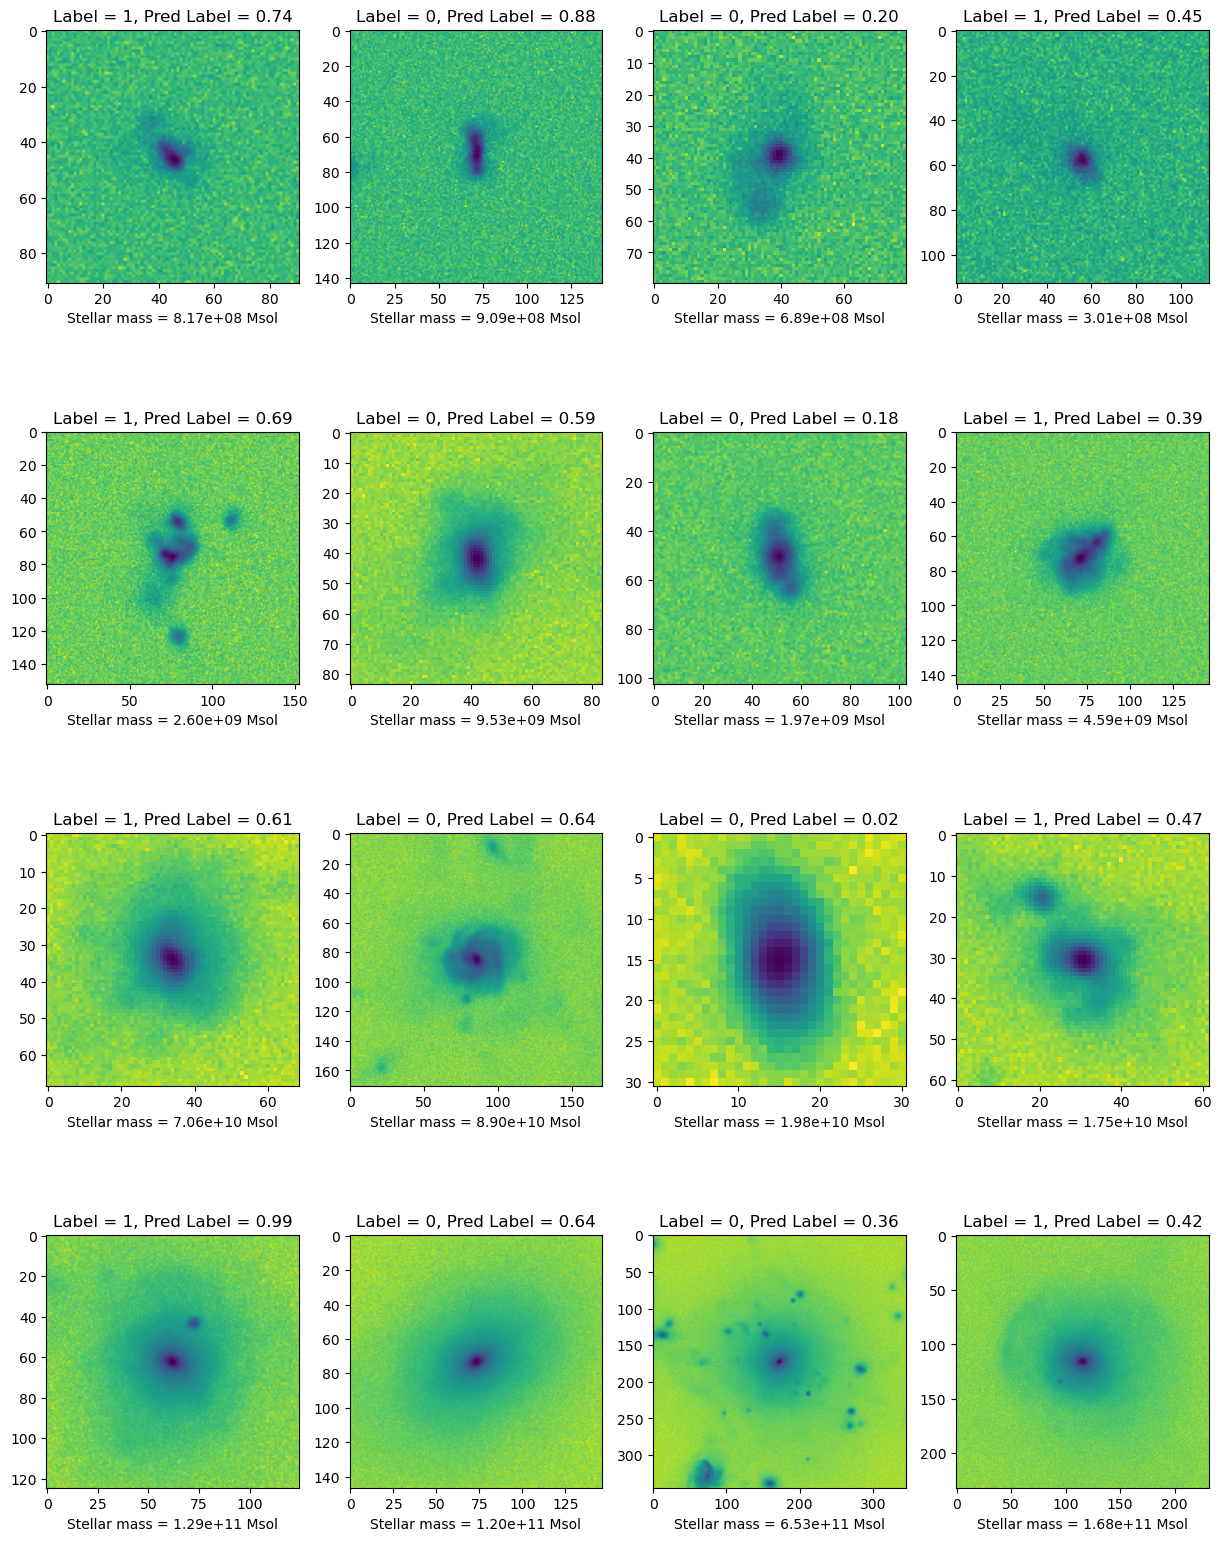

In [10]:
# Plot a few example galaxies from each population

dfs = [TP, FP, TN, FN]

mass_lims_list = [[5, 10], [20, 25], [25, 45], [45, 75]]

mass_lims_list = [[0.01, 0.1], [0.1, 1], [1, 10], [10, 100]]


fig = plt.figure(figsize = (15,5 * len(mass_lims_list)))
ax = fig.subplots(4,4)

for j, mass_lims in enumerate(mass_lims_list):

    for i, df in enumerate(dfs):
        df_filt = df.loc[(df['Mstellar'] > mass_lims[0]) & (df['Mstellar'] < mass_lims[1])].reset_index(drop = True)
        print(len(df_filt))
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            print(idx)
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            img = np.array([hdul[1].data[0][0], hdul[2].data[0][0], hdul[3].data[0][0]])
            ax[j,i].imshow(hdul[1].data[0])
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_LABEL'][idx]))
            ax[j,i].set_xlabel('Stellar mass = %.2e'%(df_filt['Mstellar'][idx] * 1e10) + ' Msol')

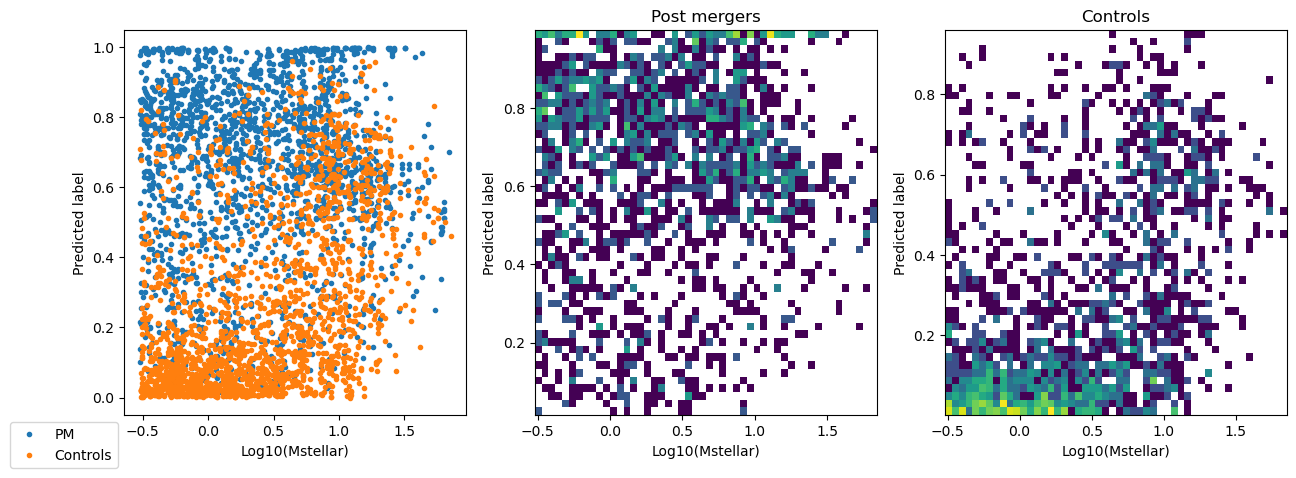

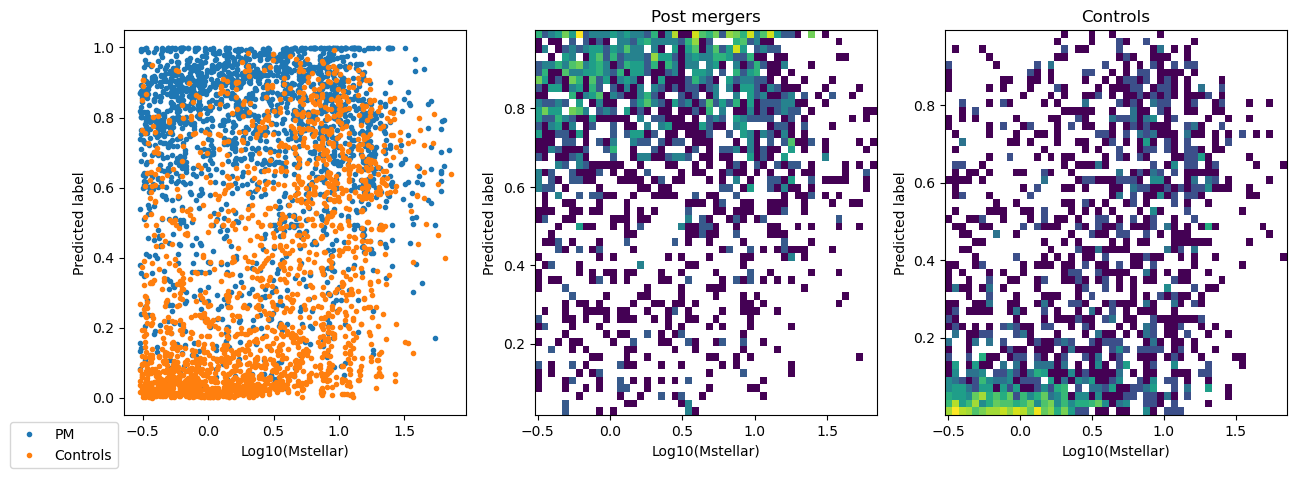

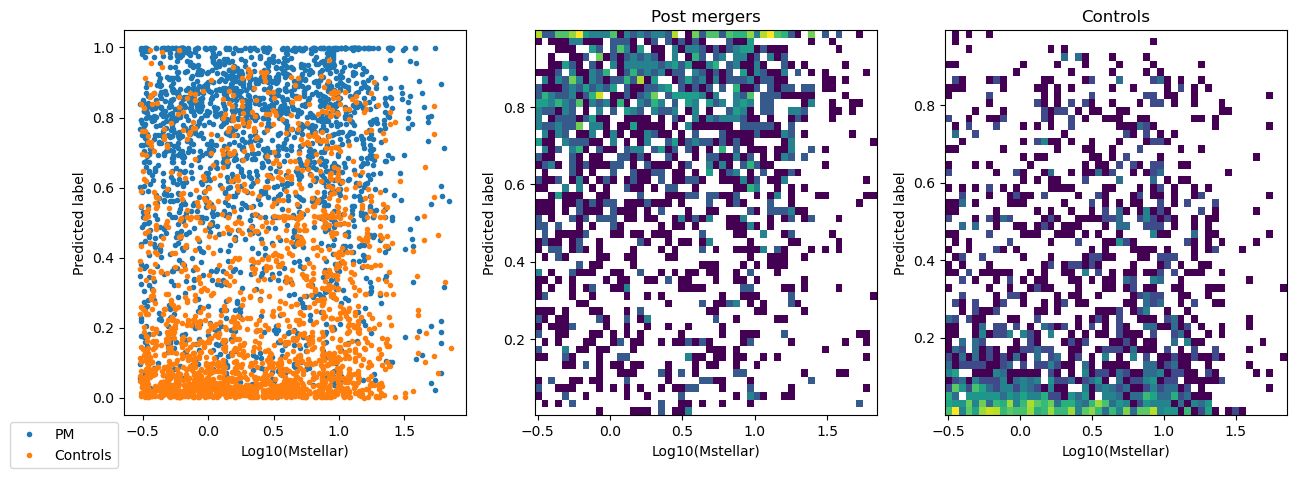

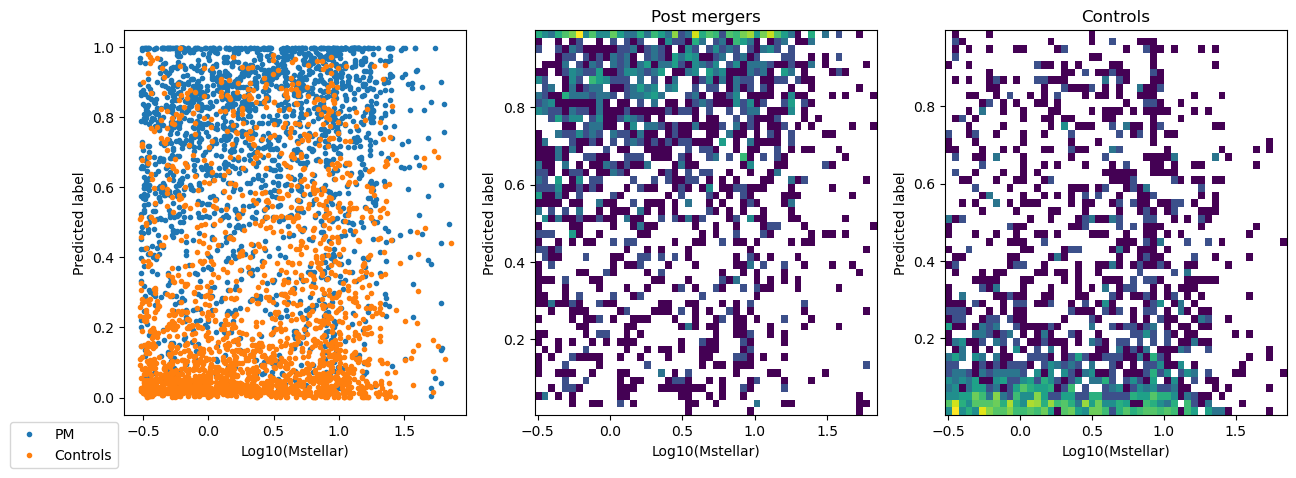

In [19]:
from matplotlib.colors import LogNorm

#results_list = [results_31, results_35, results_42]

param = 'Mstellar'

fig = plt.figure(figsize = (15, 5 * len(results_list)))
ax = fig.subplots(len(results_list), 3)

for i, results in enumerate(results_list):
    mergers = results.loc[(results['LABEL'] == 1)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 0)].reset_index(drop = True)

    merger_labels = mergers.loc[mergers[param] > 0]['PRED_LABEL']
    control_labels = controls.loc[controls[param] > 0]['PRED_LABEL']
    merger_masses = np.log10(mergers.loc[mergers[param] > 0][param])
    control_masses = np.log10(controls.loc[controls[param] > 0][param])
    
    merger_labels = mergers.loc[mergers[param] > 0]['PRED_LABEL']
    control_labels = controls.loc[controls[param] > 0]['PRED_LABEL']
    merger_masses = np.log10(mergers.loc[mergers[param] > 0][param])
    control_masses = np.log10(controls.loc[controls[param] > 0][param])

    #fig = plt.figure(figsize = (15,5))
    #ax = fig.subplots(1,3)

    ax[i, 0].plot(merger_masses, merger_labels, '.', label = 'PM')
    ax[i, 0].plot(control_masses, control_labels, '.', label = 'Controls')
    ax[i, 0].legend(bbox_to_anchor=(0, 0))
    #ax[0].set_xscale('log')

    ax[i, 1].hist2d(merger_masses,merger_labels,bins=50, norm = LogNorm())
    ax[i, 2].hist2d(control_masses,control_labels,bins=50, norm = LogNorm())

    ax[i, 1].set_title('Post mergers')
    ax[i, 2].set_title('Controls')

    for axs in ax[i, :]:
        axs.set_xlabel('Log10(%s)'%(param))
        axs.set_ylabel('Predicted label')


#plt.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),
#    ybins.min(),ybins.max()],linewidths=3,colors='black',
#    linestyles='solid')

#ax[1].contour(counts_M.transpose(),extent=[xbins_M.min(),xbins_M.max(),
#    ybins_M.min(),ybins_M.max()])


#ax[2].contour([control_masses, control_labels])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

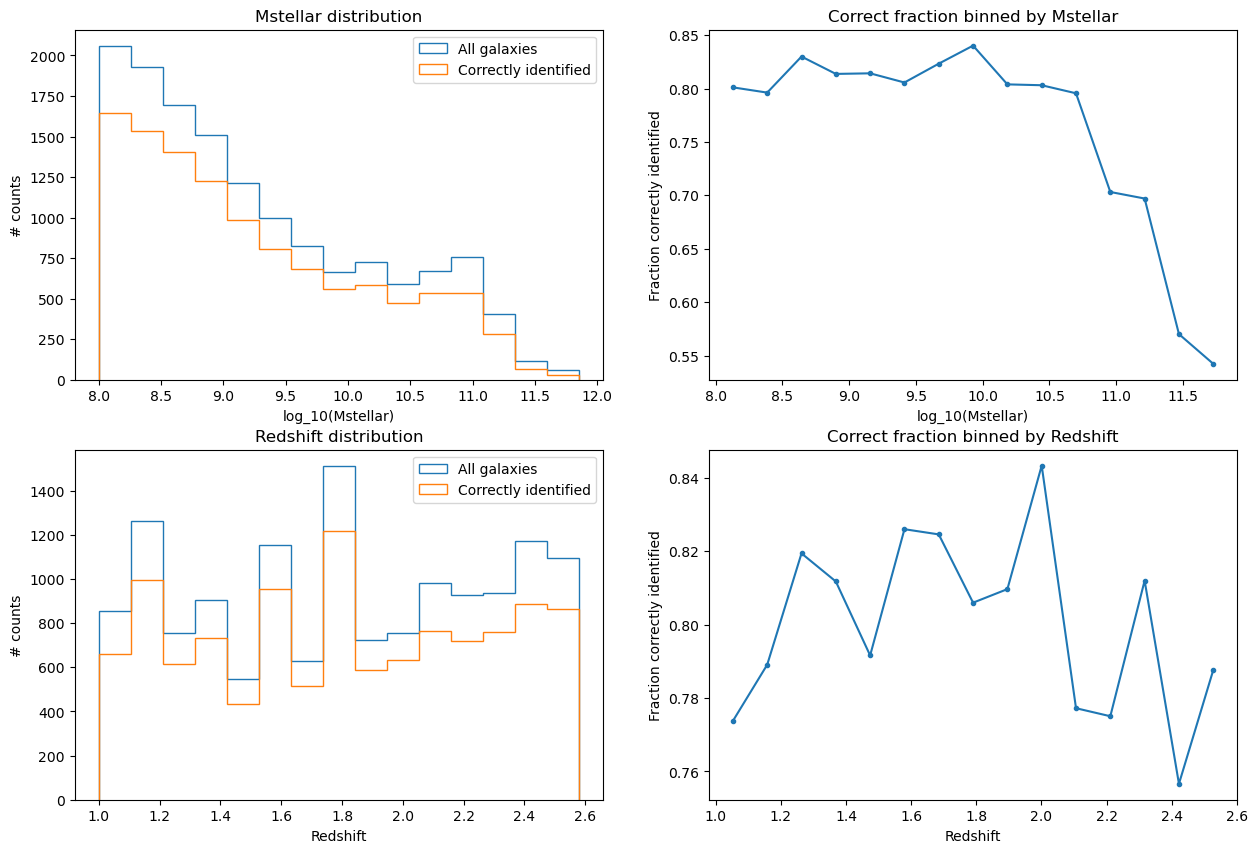

In [10]:
params = ['Mstellar', 'Redshift']
no_log = ['Redshift', 'ratio_recent', 'MBH', 'Mgas', 'SFR', 'Z', 'BHacc', 'ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest']

fig = plt.figure(figsize = (15,5 * len(params)))
ax = fig.subplots(len(params),2)

for i in range(len(params)):
    
    if params[i] in no_log:
        counts_total, edges, bars = ax[i,0].hist(results[params[i]].values, bins = 15, histtype = 'step', label = 'All galaxies')
        counts, edges, bars = ax[i,0].hist(true[params[i]].values, bins = edges, histtype = 'step', label = 'Correctly identified')
    
    else:
        counts_total, edges, bars = ax[i,0].hist(np.log10(results[params[i]].values * 1e10), bins = 15, histtype = 'step', label = 'All galaxies')
        counts, edges, bars = ax[i,0].hist(np.log10(true[params[i]].values * 1e10), bins = edges, histtype = 'step', label = 'Correctly identified')
    
    centers = 0.5*(edges[1:]+ edges[:-1])
    ax[i,1].plot(centers, counts/counts_total, '.-')
    ax[i,1].set_ylabel('Fraction correctly identified')
    ax[i,1].set_title('Correct fraction binned by ' + params[i])
    
    ax[i,0].set_title(params[i] + ' distribution')
    ax[i,0].set_ylabel('# counts')
    ax[i,0].legend()
ax[0,0].set_xlabel('log_10(Mstellar)')
ax[0,1].set_xlabel('log_10(Mstellar)')

ax[1,0].set_xlabel('Redshift')
ax[1,1].set_xlabel('Redshift')
    
    
#plt.hist(np.log10(false.Mstellar.values), histtype = 'step', density = True)
plt.tight_layout

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

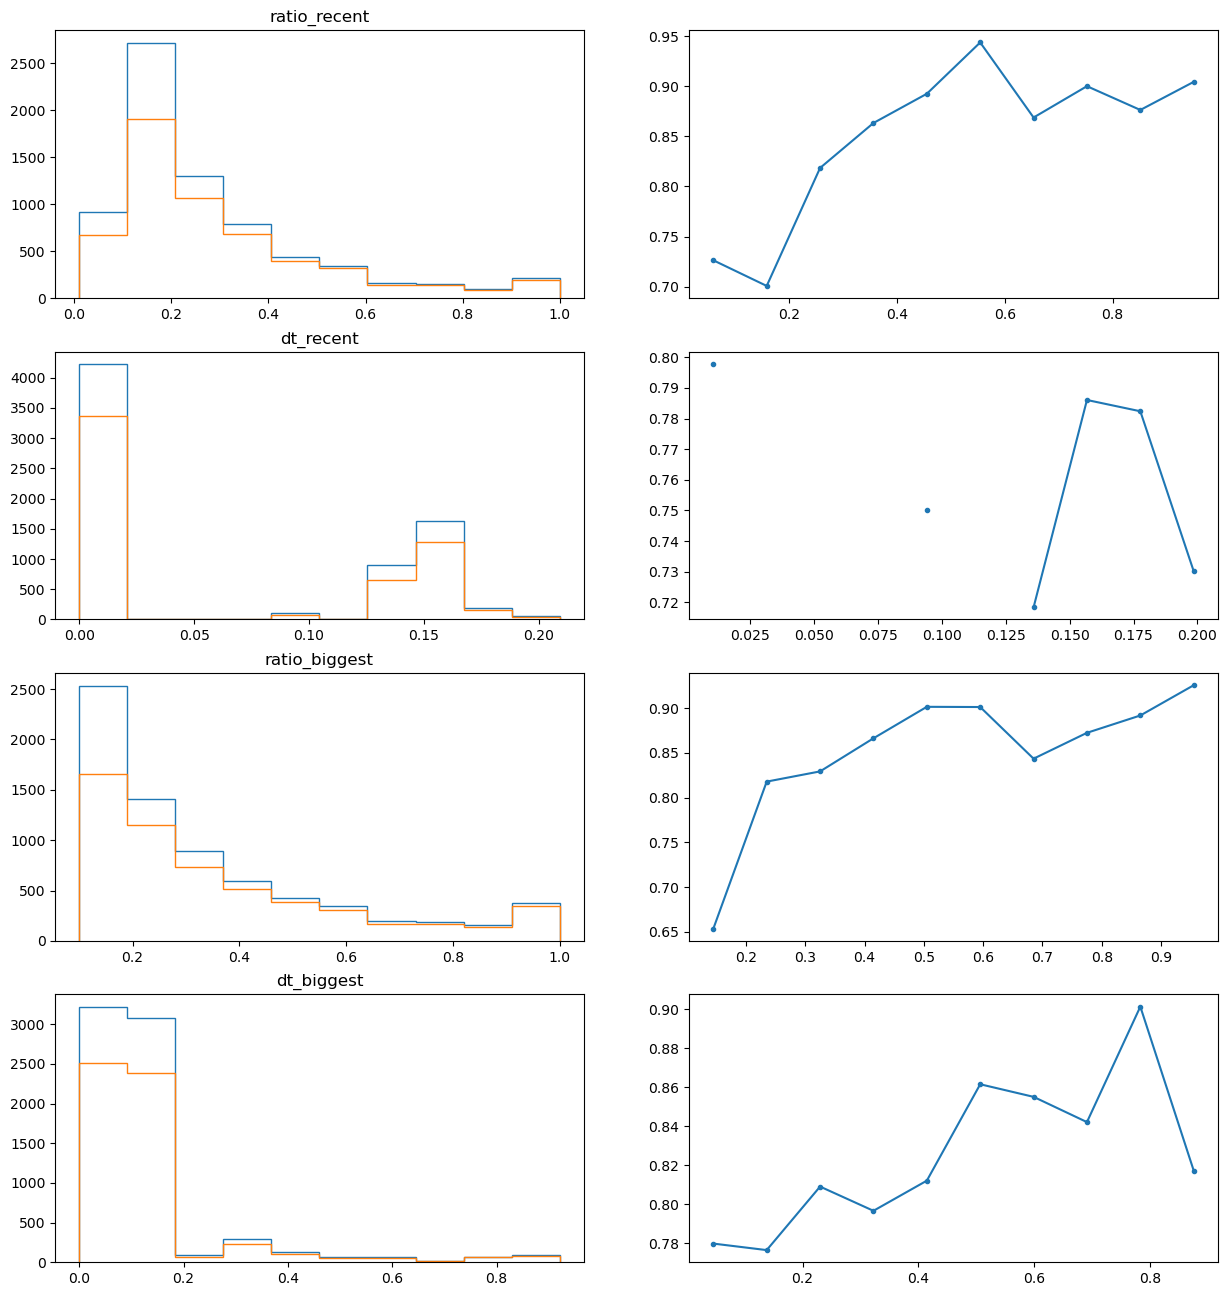

In [11]:
params = ['ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest']


fig = plt.figure(figsize = (15,4 * len(params)))
ax = fig.subplots(len(params),2)

for i in range(len(params)):
    
    if params[i] in no_log:
        counts_total, edges, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][params[i]].values, bins = 10, histtype = 'step')
        counts, edges, bars = ax[i,0].hist(true.loc[true['LABEL'] == 1][params[i]].values, bins = 10, histtype = 'step')
    
    else:
        counts_total, edges, bars = ax[i,0].hist(np.log10(results[params[i]].values), bins = 15, histtype = 'step')
        counts, edges, bars = ax[i,0].hist(np.log10(true[params[i]].values), bins = 15, histtype = 'step')
    
    centers = 0.5*(edges[1:]+ edges[:-1])
    ax[i,1].plot(centers, counts/counts_total, '.-')    
    ax[i,0].set_title(params[i])
    
    
#plt.hist(np.log10(false.Mstellar.values), histtype = 'step', density = True)
plt.tight_layout

In [33]:
params = ['Mstellar', 'Redshift', 'MBH', 'MDM', 'Mgas', 'SFR', 'Z',
       'HMRad', 'BHacc', 'GAS_FRAC']
no_log = ['Redshift', 'ratio_recent', 'HMRad', 'Z', 'ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest','GAS_FRAC']

scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1}

def plot_split_results(results, TP, TN, params, no_log):
    
    
    

    fig = plt.figure(figsize = (15,6 * len(params)))
    ax = fig.subplots(len(params),2)
    
    probs = []

    for i in range(len(params)):
         
        error_bars = []

        if params[i] in no_log:
            counts_M_total, edges_M, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][params[i]].values, bins = 15, histtype = 'step', label = 'Post Mergers')
            counts_M, edges, bars = ax[i,0].hist(TP[params[i]].values, bins = edges_M, histtype = 'step', label = 'TP')
            counts_NM_total, edges_NM, bars = ax[i,0].hist(results.loc[results['LABEL'] == 0][params[i]].values, bins = edges_M, histtype = 'step', label = 'Controls')
            counts_NM, edges, bars = ax[i,0].hist(TN[params[i]].values, bins = edges_M, histtype = 'step', label = 'TN')

        else:
            # Create variable with log(results) and set -inf = 0
            
            results_M_total = np.log10(results.loc[results['LABEL'] == 1][params[i]].values * scale[params[i]])
            results_M = np.log10(TP[params[i]].values * 1e10)
            results_NM_total = np.log10(results.loc[results['LABEL'] == 0][params[i]].values * scale[params[i]])
            results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][params[i]].values * scale[params[i]])
            
            results_M_total[results_M_total == -np.inf] = 0
            results_M[results_M == -np.inf] = 0
            results_NM_total[results_NM_total == -np.inf] = 0
            results_NM[results_NM == -np.inf] = 0
            
            counts_M_total, edges_M, bars = ax[i,0].hist(results_M_total, bins = 15, histtype = 'step', label = 'Post Mergers')
            counts_M, edges, bars = ax[i,0].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
            counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, bins = edges_M, histtype = 'step', label = 'Controls')
            counts_NM, edges, bars = ax[i,0].hist(results_NM, bins = edges_M, histtype = 'step', label = 'TN')
            
            #counts_M_total, edges_M, bars = ax[i,0].hist(np.log10(results.loc[results['LABEL'] == 1][params[i]].values * 1e10), bins = 15, histtype = 'step', label = 'Post Mergers')
            #counts_M, edges, bars = ax[i,0].hist(np.log10(TP[params[i]].values * 1e10), bins = edges_M, histtype = 'step', label = 'TP')
            #counts_NM_total, edges_NM, bars = ax[i,0].hist(np.log10(results.loc[results['LABEL'] == 0][params[i]].values * 1e10), bins = 15, histtype = 'step', label = 'Controls')
            #counts_NM, edges, bars = ax[i,0].hist(np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][params[i]].values * 1e10), bins = edges_NM, histtype = 'step', label = 'TN')
        
        if params[i] not in no_log:
            edges_M = 10**(edges_M-10)
            
        c = 0.683
        k_M, k_NM = counts_M, counts_NM
        n_M, n_NM = counts_M_total, counts_NM_total
        p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
        p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)
        
        
        
        probs_M_total = []
        probs_M = []
        probs_NM_total = []
        probs_NM = []
        bin_edges = []
        
        for j in range(len(edges_M) - 1):
            probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[params[i]] > edges_M[j]) & (results[params[i]] < edges_M[j + 1])]['PRED_LABEL'].values)
            probs_M.append(TP.loc[(results[params[i]] > edges_M[j]) & (results[params[i]] < edges_M[j + 1])]['PRED_LABEL'].values)
            probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[params[i]] > edges_M[j]) & (results[params[i]] < edges_M[j + 1])]['PRED_LABEL'].values)
            probs_NM.append(TN.loc[(results[params[i]] > edges_M[j]) & (results[params[i]] < edges_M[j + 1])]['PRED_LABEL'].values)
            bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))
            
        
        probs.append([probs_M_total, probs_M, probs_NM_total, probs_NM, bin_edges])
        

        centers = 0.5*(edges[1:]+ edges[:-1])
        yerr = np.absolute(np.array([p_M_lower - counts_M/counts_M_total, p_M_upper - counts_M/counts_M_total]))
        
        ax[i,1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')
        
        yerr = np.absolute(np.array([p_NM_lower - counts_NM/counts_NM_total, p_NM_upper - counts_NM/counts_NM_total]))
        
        ax[i,1].errorbar(centers, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
        ax[i,1].set_ylabel('Fraction correctly identified')
        ax[i,1].set_title('Correct fraction binned by ' + params[i])
        ax[i,1].set_ylim(0, 1.05)
        ax[i,1].legend()
        
        
        ax[i,0].set_title(params[i] + ' distribution')
        ax[i,0].set_ylabel('# counts')
        ax[i,0].legend()
        
    ax[0,0].set_xlabel('log_10(Mstellar)')
    ax[0,1].set_xlabel('log_10(Mstellar)')

    ax[1,0].set_xlabel('Redshift')
    ax[1,1].set_xlabel('Redshift')

    
    #plt.hist(np.log10(false.Mstellar.values), histtype = 'step', density = True)
    plt.tight_layout
    
    return np.array(probs), centers

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs

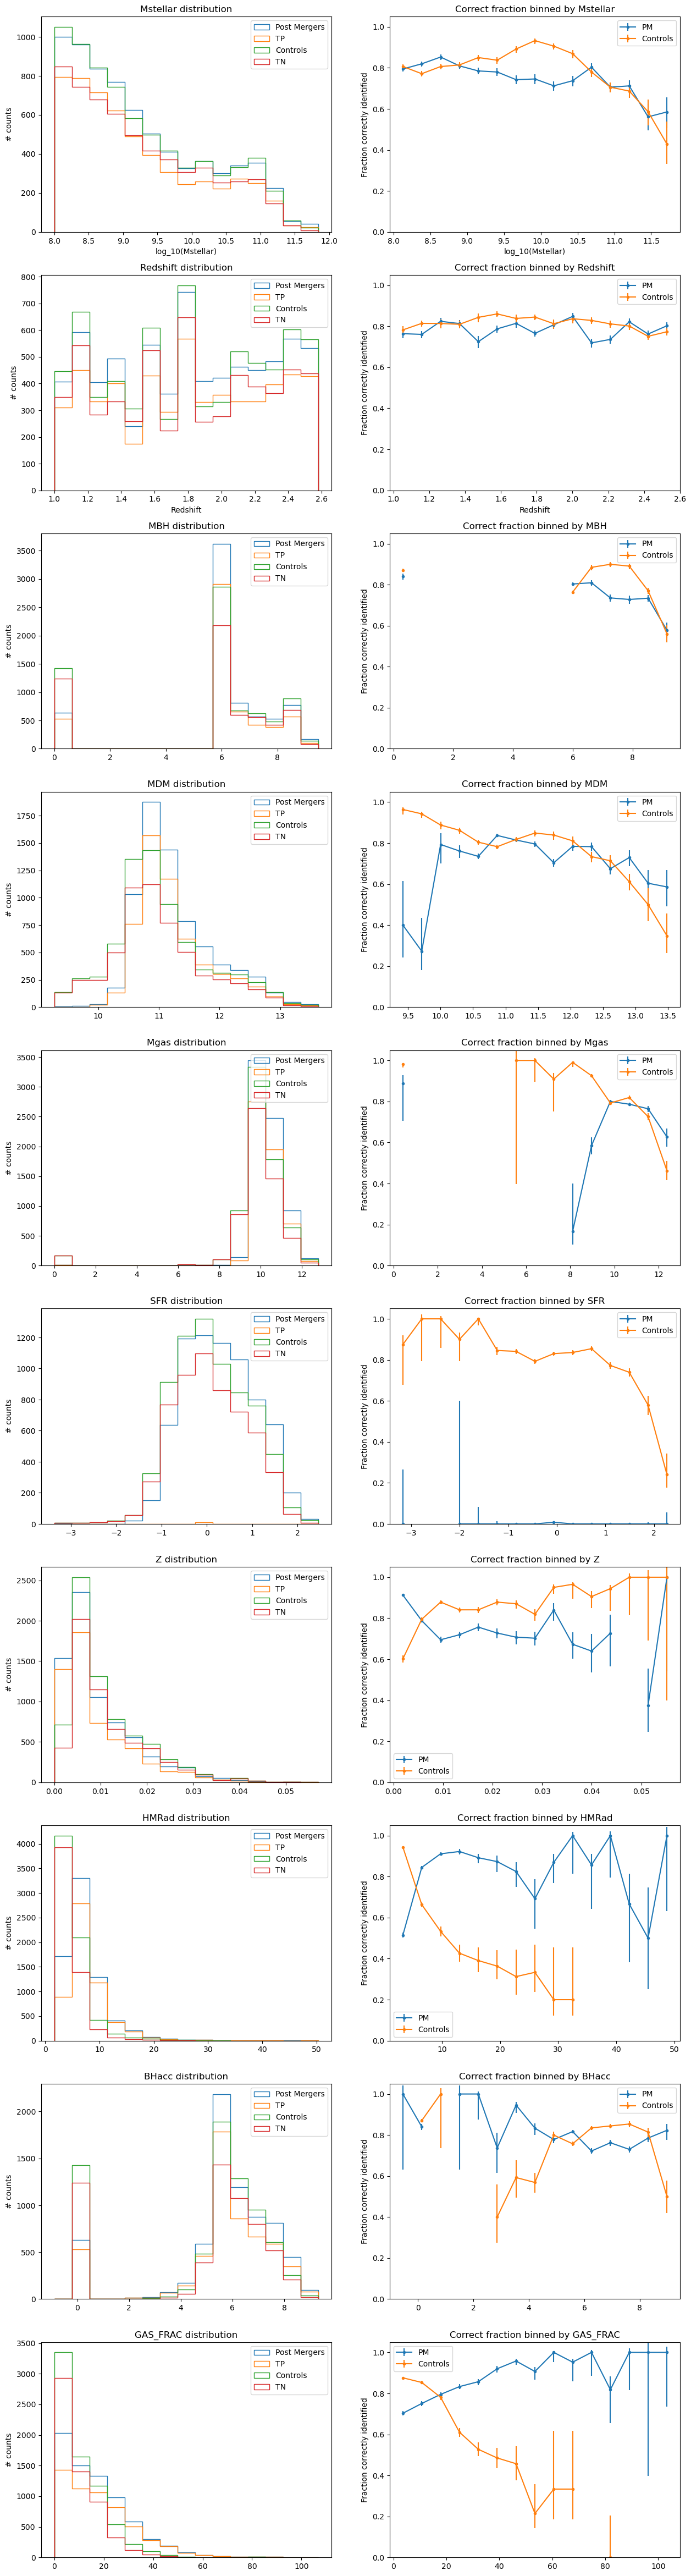

In [34]:
probs, centers = plot_split_results(results, TP, TN, params, no_log)

(15,)
1.0
0.01827740911551717
0 0
8.006120871236599 8.261914633050914
1 0
8.773502156679545 9.029295918493862
2 0
9.540883442122492 9.796677203936808
3 0
10.308264727565438 10.564058489379754
4 0
10.819852251194071 11.075646013008384
5 0
11.331439774822702 11.587233536637017
1.1053333333333333
0 1
10.0 10.043493267158574
1 1
10.119255889277937 10.152695941298854
2 1
10.212720154417843 10.239883152320884
3 1
10.289588952542596 10.312459457444763
4 1
10.334185585361674 10.354876422516234
5 1
10.374626164413602 10.393516708491143


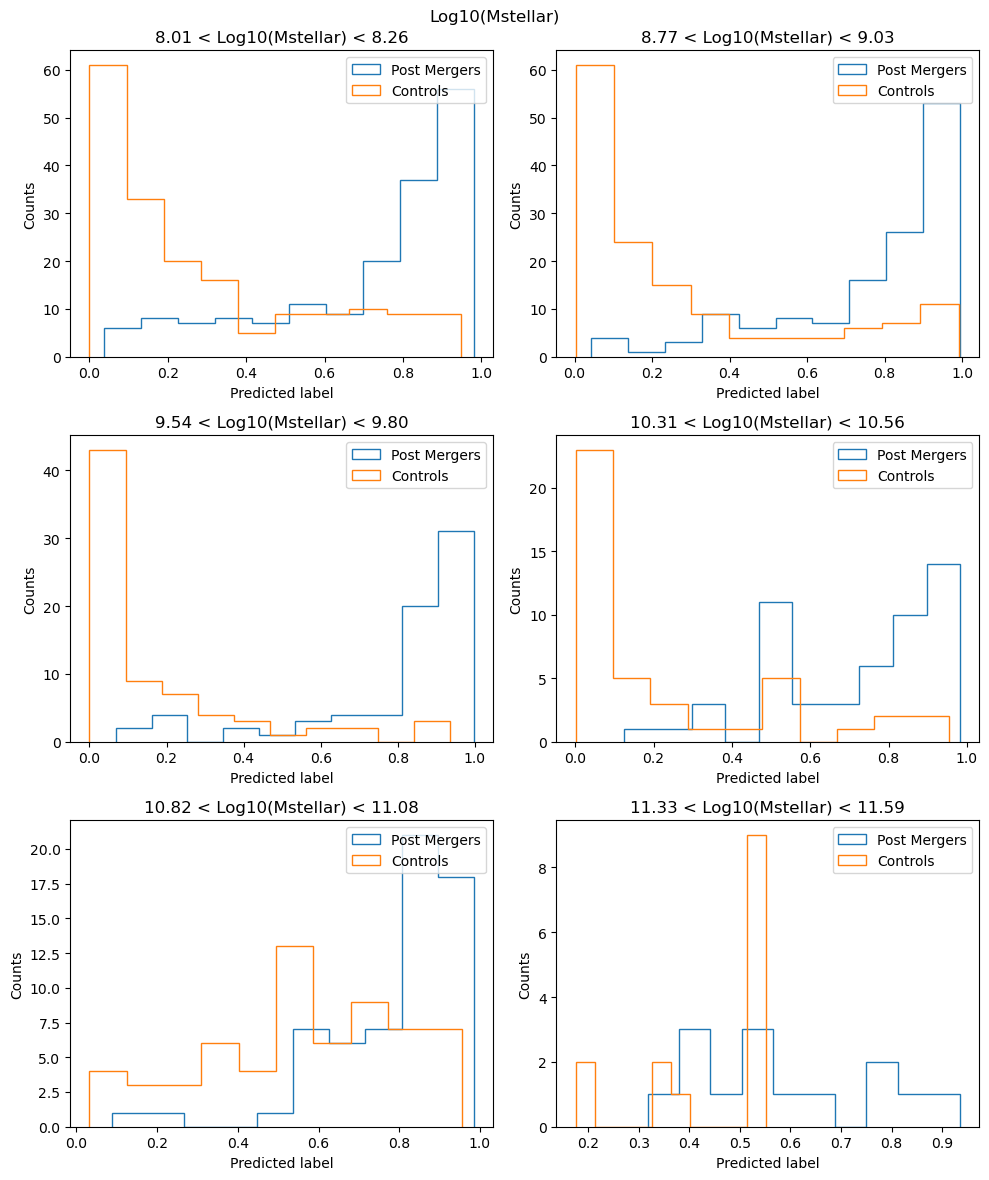

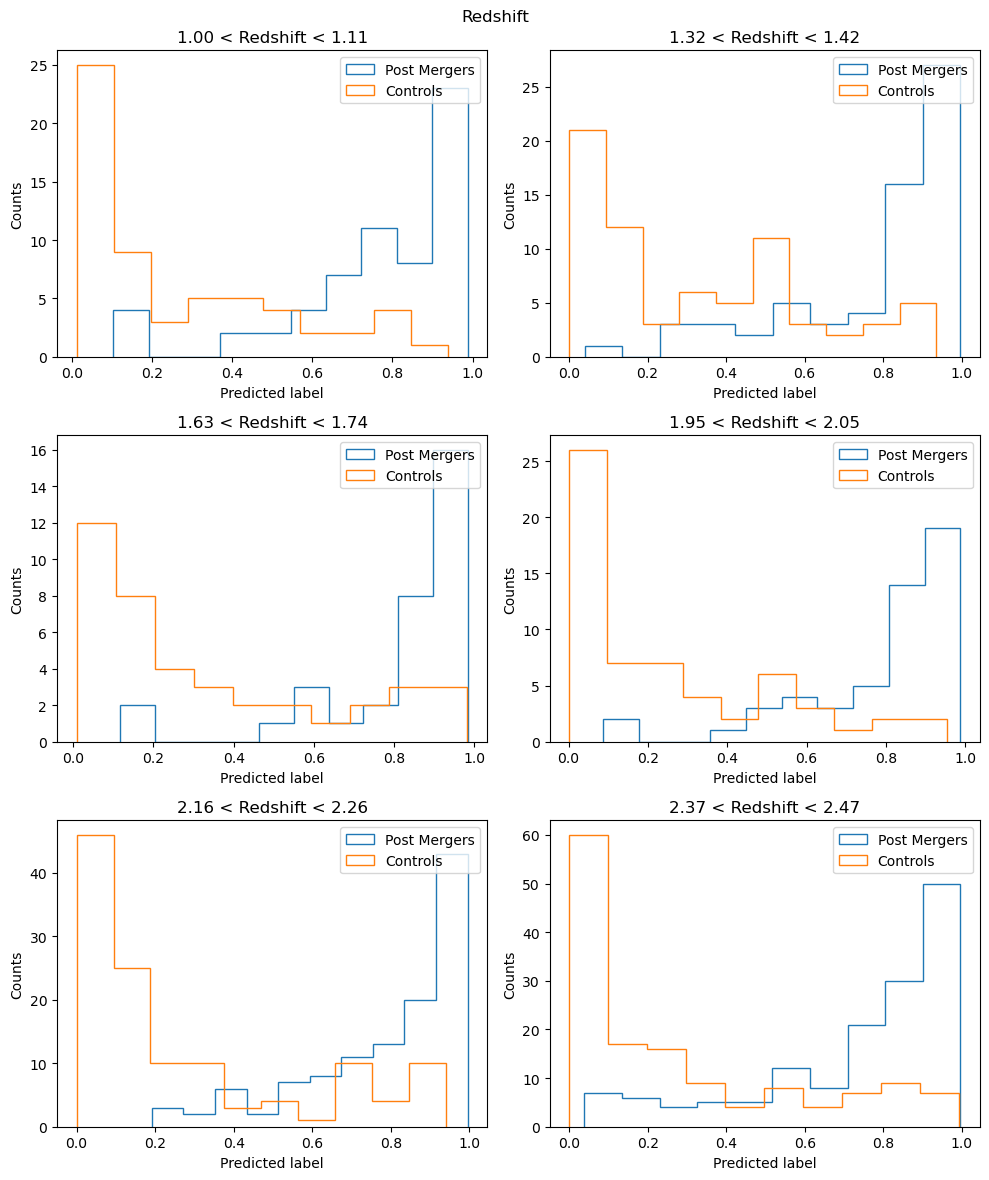

In [167]:
print(probs[0,1].shape)
print(probs[j,4][0][0])

bins = [0, 3, 6, 9, 11, 13]

params = ['Log10(Mstellar)', 'Redshift']

for j in range(len(params)):
    
    fig = plt.figure(figsize = (10, 2* int(len(bins))))
    ax = fig.subplots(int(len(bins)/2), 2)
    edges = np.array(probs[j,4])
    
    print(edges[0][1])
    
    for i in range(len(bins)):
        print(i, j)
        
        #ax[int(i/2), int(i%2)].hist(np.append(probs[j,0,bins[i]], probs[j,2,bins[i]]), histtype = 'step')
        ax[int(i/2), int(i%2)].hist(probs[j,0,bins[i]], histtype = 'step', label = 'Post Mergers')
        ax[int(i/2), int(i%2)].hist(probs[j,2,bins[i]], histtype = 'step', label = 'Controls')
        
        
        ax[int(i/2), int(i%2)].legend()
        ax[int(i/2), int(i%2)].set_xlabel('Predicted label')
        ax[int(i/2), int(i%2)].set_ylabel('Counts')
        
        if params[j] not in no_log:
            bin_min = np.log10(edges[bins[i]][0] * 1e10)
            bin_max = np.log10(edges[bins[i]][1] * 1e10)
        else:
            bin_min = edges[bins[i]][0]
            bin_max = edges[bins[i]][1]
        
        ax[int(i/2), int(i%2)].set_title('%.2f < %s < %.2f' % (bin_min, params[j], bin_max))
        
        print(np.log10(edges[bins[i]][0] * 1e10), np.log10(edges[bins[i]][1] * 1e10))
        
    fig.suptitle(params[j])
    fig.tight_layout()



In [15]:
results

SFID  SnapNum   Mstellar       MBH         MDM       Mgas  \
0     376808.0     43.0   0.060560  0.000160   14.598457   2.062304   
1     430255.0     31.0   0.025230  0.000148    3.338307   0.391981   
2      14894.0     44.0  22.788361  0.102412  239.308029   6.698267   
3      72886.0     31.0   4.919187  0.012897  111.198540  17.833580   
4     358972.0     38.0   0.153068  0.000173   10.072051   1.741873   
...        ...      ...        ...       ...         ...        ...   
2554   38838.0     31.0   7.533486  0.031367  275.384308  35.644176   
2555  292751.0     45.0   0.387525  0.001301   38.106148   6.440798   
2556  223119.0     42.0   2.852352  0.011939   80.843353  11.344776   
2557  276796.0     34.0   0.158616  0.000234   16.931177   2.239113   
2558  479953.0     43.0   0.030742  0.000097    5.440485   0.493736   

             SFR         Z     HMRad     BHacc  ...  SFID_recent  snap_recent  \
0       0.781217  0.003755  7.041241  0.000022  ...     376808.0         43.0   
1       0.264703  0.007142  4.037092  0.000060  ...          0.0          0.0   
2      13.771405  0.023283  8.815554  0.000415  ...          0.0          0.0   
3      57.104038  0.031479  5.948026  0.036438  ...      72886.0         31.0   
4       2.295779  0.008993  4.793128  0.000087  ...     300307.0         33.0   
...          ...       ...       ...       ...  ...          ...          ...   
2554  155.602066  0.018792  4.572285  0.067868  ...      38838.0         31.0   
2555    4.630165  0.010929  5.025292  0.000664  ...          0.0          0.0   
2556    9.385791  0.038638  5.727008  0.007633  ...     223119.0         42.0   
2557    3.083119  0.009002  4.951377  0.000412  ...     276796.0         34.0   
2558    0.234437  0.006221  4.177546  0.000016  ...          0.0          0.0   

      ratio_biggest  dt_biggest  SFID_biggest  snap_biggest  Redshift  \
0          0.315066       0.914      376715.0          37.0      1.30   
1          0.000000       0.000           0.0           0.0      2.21   
2          0.000000       0.000           0.0           0.0      1.25   
3          0.370903       0.000       72886.0          31.0      2.21   
4          0.010381       0.753      300307.0          33.0      1.60   
...             ...         ...           ...           ...       ...   
2554       0.461014       0.836       39803.0          25.0      2.21   
2555       0.000000       0.000           0.0           0.0      1.21   
2556       0.302481       0.000      223119.0          42.0      1.36   
2557       0.037685       0.000      276796.0          34.0      1.90   
2558       0.000000       0.000           0.0           0.0      1.30   

                   GAS_FRAC  PRED_LABEL LABEL  
0       [34.05382677175623]    0.958378   1.0  
1      [15.536155806970585]    0.123981   0.0  
2     [0.29393369281225185]    0.552291   0.0  
3       [3.625310395226653]    0.982744   1.0  
4      [11.379712849276437]    0.019260   0.0  
...                     ...         ...   ...  
2554    [4.731431736936056]    0.984948   1.0  
2555    [16.62035964007845]    0.431068   0.0  
2556   [3.9773413253335317]    0.950140   1.0  
2557   [14.116531571132162]    0.815979   0.0  
2558    [16.06081326840235]    0.682156   0.0  

[2559 rows x 22 columns]

In [28]:
results.loc[(results['Mgas'] >100) & (results['Mgas'] < 1e4)]

SFID  SnapNum   Mstellar       MBH          MDM        Mgas  \
14     14099.0     38.0  39.878448  0.117786  2212.977051  281.864471   
17      8492.0     43.0  50.760540  0.176392  3189.184814  457.288544   
51     17121.0     36.0  17.578279  0.054122  1001.813660  129.002167   
154    41321.0     46.0  18.795649  0.058232  1283.419067  163.068237   
248    59167.0     50.0  19.931412  0.092539  1400.407471  139.594467   
...        ...      ...        ...       ...          ...         ...   
13700  52752.0     46.0  24.096954  0.106958  1000.712036  114.491402   
13734   7343.0     39.0  35.298000  0.060451  1763.166138  216.358109   
13887  31452.0     50.0  45.840069  0.182512  2790.629639  409.721039   
14015  26197.0     41.0  30.882215  0.141811  1410.936035  157.860550   
14081  11698.0     47.0  56.797428  0.215331  3913.536377  557.210144   

              SFR         Z      HMRad     BHacc  ...  SFID_recent  \
14      69.007767  0.009375   8.764400  0.005211  ...          0.0   
17     119.243713  0.015771  27.754585  0.000730  ...       8492.0   
51      38.423603  0.015522  12.244317  0.002253  ...      17121.0   
154     59.423988  0.011884  19.804935  0.000229  ...          0.0   
248      5.135779  0.010184  10.616355  0.002340  ...          0.0   
...           ...       ...        ...       ...  ...          ...   
13700   28.670851  0.013553  15.264771  0.000073  ...      44664.0   
13734  202.747375  0.013883  21.768412  0.000632  ...          0.0   
13887    8.551728  0.008462  28.187551  0.000464  ...          0.0   
14015   16.073681  0.014151  29.423120  0.000863  ...      26197.0   
14081   23.399633  0.006667  25.130991  0.002346  ...       9240.0   

       snap_recent  ratio_biggest  dt_biggest  SFID_biggest  snap_biggest  \
14             0.0       0.000000       0.000           0.0           0.0   
17            43.0       0.136266       0.000        8492.0          43.0   
51            36.0       0.103133       0.000       17121.0          36.0   
154            0.0       0.000000       0.000           0.0           0.0   
248            0.0       0.000000       0.000           0.0           0.0   
...            ...            ...         ...           ...           ...   
13700         41.0       0.040974       0.787       44664.0          41.0   
13734          0.0       0.000000       0.000           0.0           0.0   
13887          0.0       0.000000       0.000           0.0           0.0   
14015         41.0       0.177989       0.296       24433.0          39.0   
14081         46.0       0.023644       0.142        9240.0          46.0   

       Redshift  GAS_FRAC  PRED_LABEL  LABEL  
14         1.60  7.068090    0.513845    0.0  
17         1.30  9.008741    0.675477    1.0  
51         1.74  7.338725    0.671412    1.0  
154        1.15  8.675851    0.638099    0.0  
248        1.00  7.003742    0.675477    0.0  
...         ...       ...         ...    ...  
13700      1.15  4.751281    0.397757    0.0  
13734      1.53  6.129472    0.640616    0.0  
13887      1.00  8.938055    0.665529    0.0  
14015      1.41  5.111698    0.527164    1.0  
14081      1.11  9.810482    0.606439    0.0  

[177 rows x 22 columns]

In [8]:
params = ['Mstellar', 'Redshift', 'HMRad']

#params = ['Mstellar', 'Redshift', 'MBH', 'MDM', 'Mgas', 'SFR', 'Z',
#       'HMRad', 'BHacc', 'GAS_FRAC']

no_log = ['Redshift', 'ratio_recent', 'Z', 'ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest','GAS_FRAC']

scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'HMRad' : 1}
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])'}

def plot_multi_results(results_list, params, no_log):
    

    for param in params:
        
        fig = plt.figure(figsize = (15,6 * len(results_list)))
        ax = fig.subplots(len(results_list),2)
        
        probs = []
        
        for i, results in enumerate(results_list):
            
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][param].values, bins = 15, histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results.loc[results['LABEL'] == 0][param].values, bins = edges_M, histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TN')

            else:
                # Create variable with log(results) and set -inf = 0

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values * scale[param])

                
                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                

                counts_M_total, edges_M, bars = ax[i,0].hist(results_M_total, bins = 15, histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, bins = edges_M, histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,0].hist(results_NM, bins = edges_M, histtype = 'step', label = 'TN')
                
                
                #counts_M_total, edges_M, bars = ax[i,0].hist(np.log10(results.loc[results['LABEL'] == 1][params[i]].values * 1e10), bins = 15, histtype = 'step', label = 'Post Mergers')
                #counts_M, edges, bars = ax[i,0].hist(np.log10(TP[params[i]].values * 1e10), bins = edges_M, histtype = 'step', label = 'TP')
                #counts_NM_total, edges_NM, bars = ax[i,0].hist(np.log10(results.loc[results['LABEL'] == 0][params[i]].values * 1e10), bins = 15, histtype = 'step', label = 'Controls')
                #counts_NM, edges, bars = ax[i,0].hist(np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][params[i]].values * 1e10), bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for j in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            ax[i,0].set_title(param + ' distribution')
            ax[i,0].set_ylabel('# counts')
            ax[i,0].set_xlabel(xlabels[param])
            ax[i,0].legend()
            
            probs.append([probs_M_total, probs_M, probs_NM_total, probs_NM, bin_edges])


            centers = 0.5*(edges[1:]+ edges[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            ax[i,1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[i,1].errorbar(centers, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            ax[i,1].set_ylabel('Fraction correctly identified')
            ax[i,1].set_title('Correct fraction binned by ' + param)
            ax[i,1].set_ylim(0, 1.05)
            ax[i,1].legend()


        #plt.hist(np.log10(false.Mstellar.values), histtype = 'step', density = True)
        plt.tight_layout()

    #return np.array(probs), centers

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_d

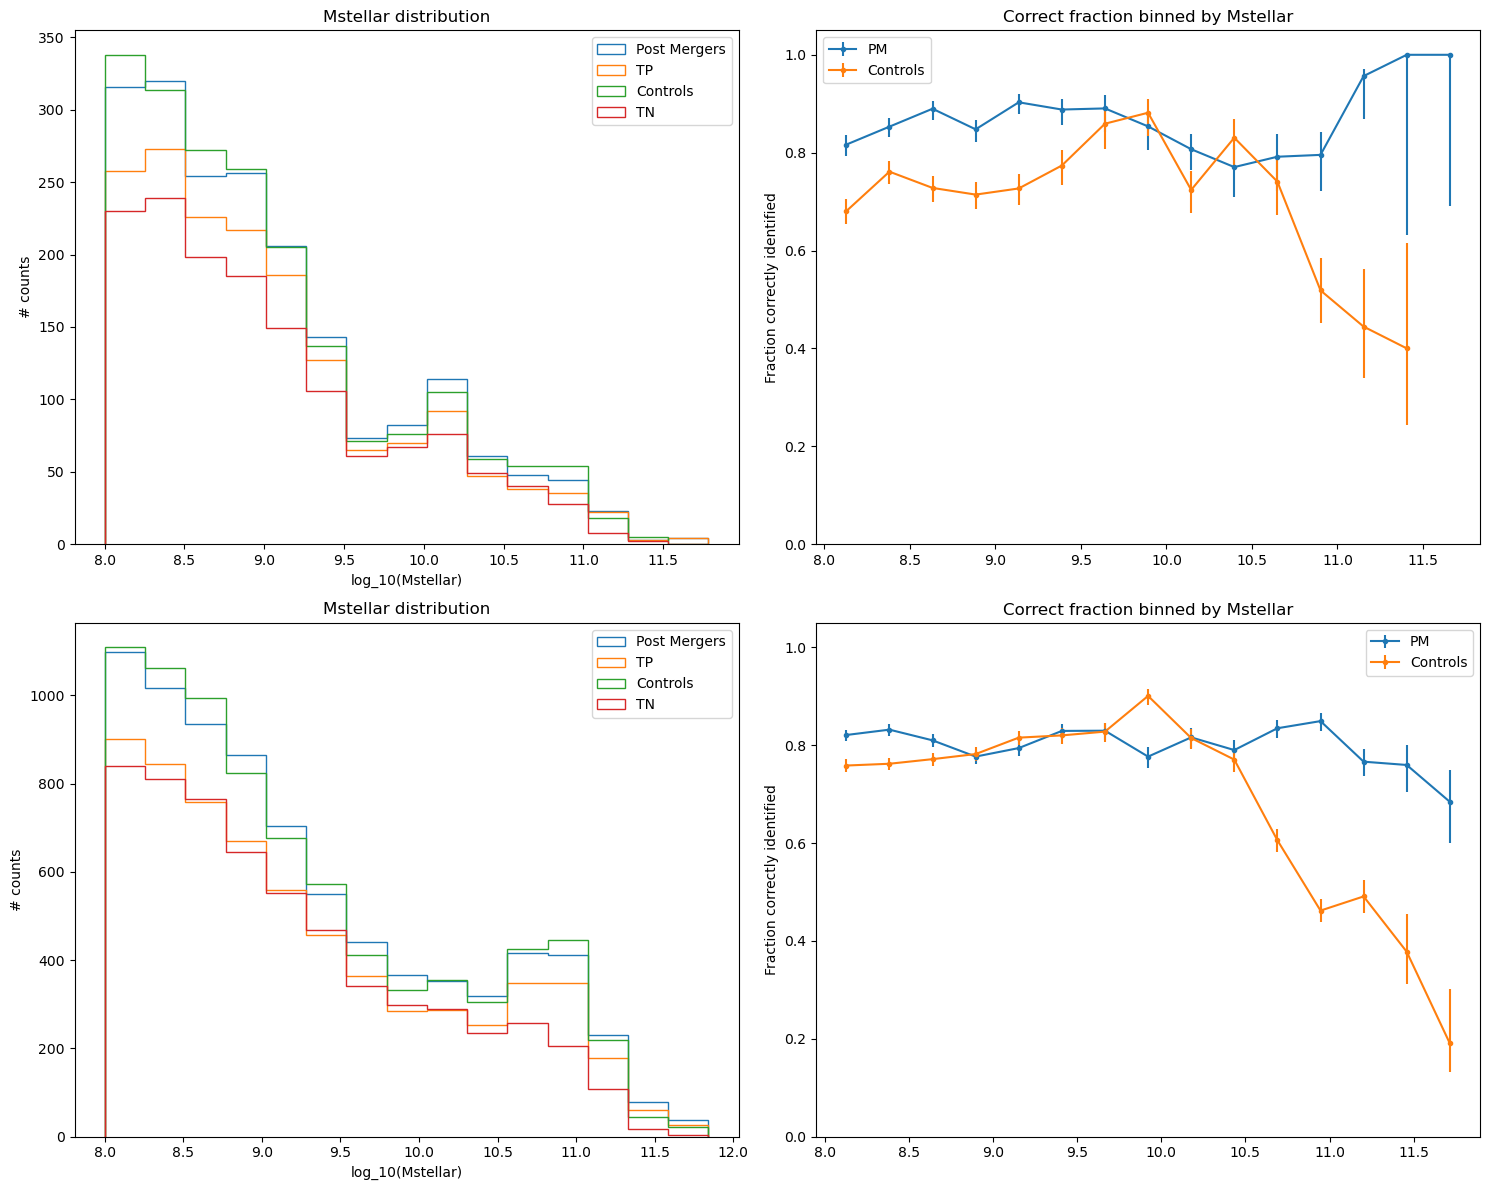

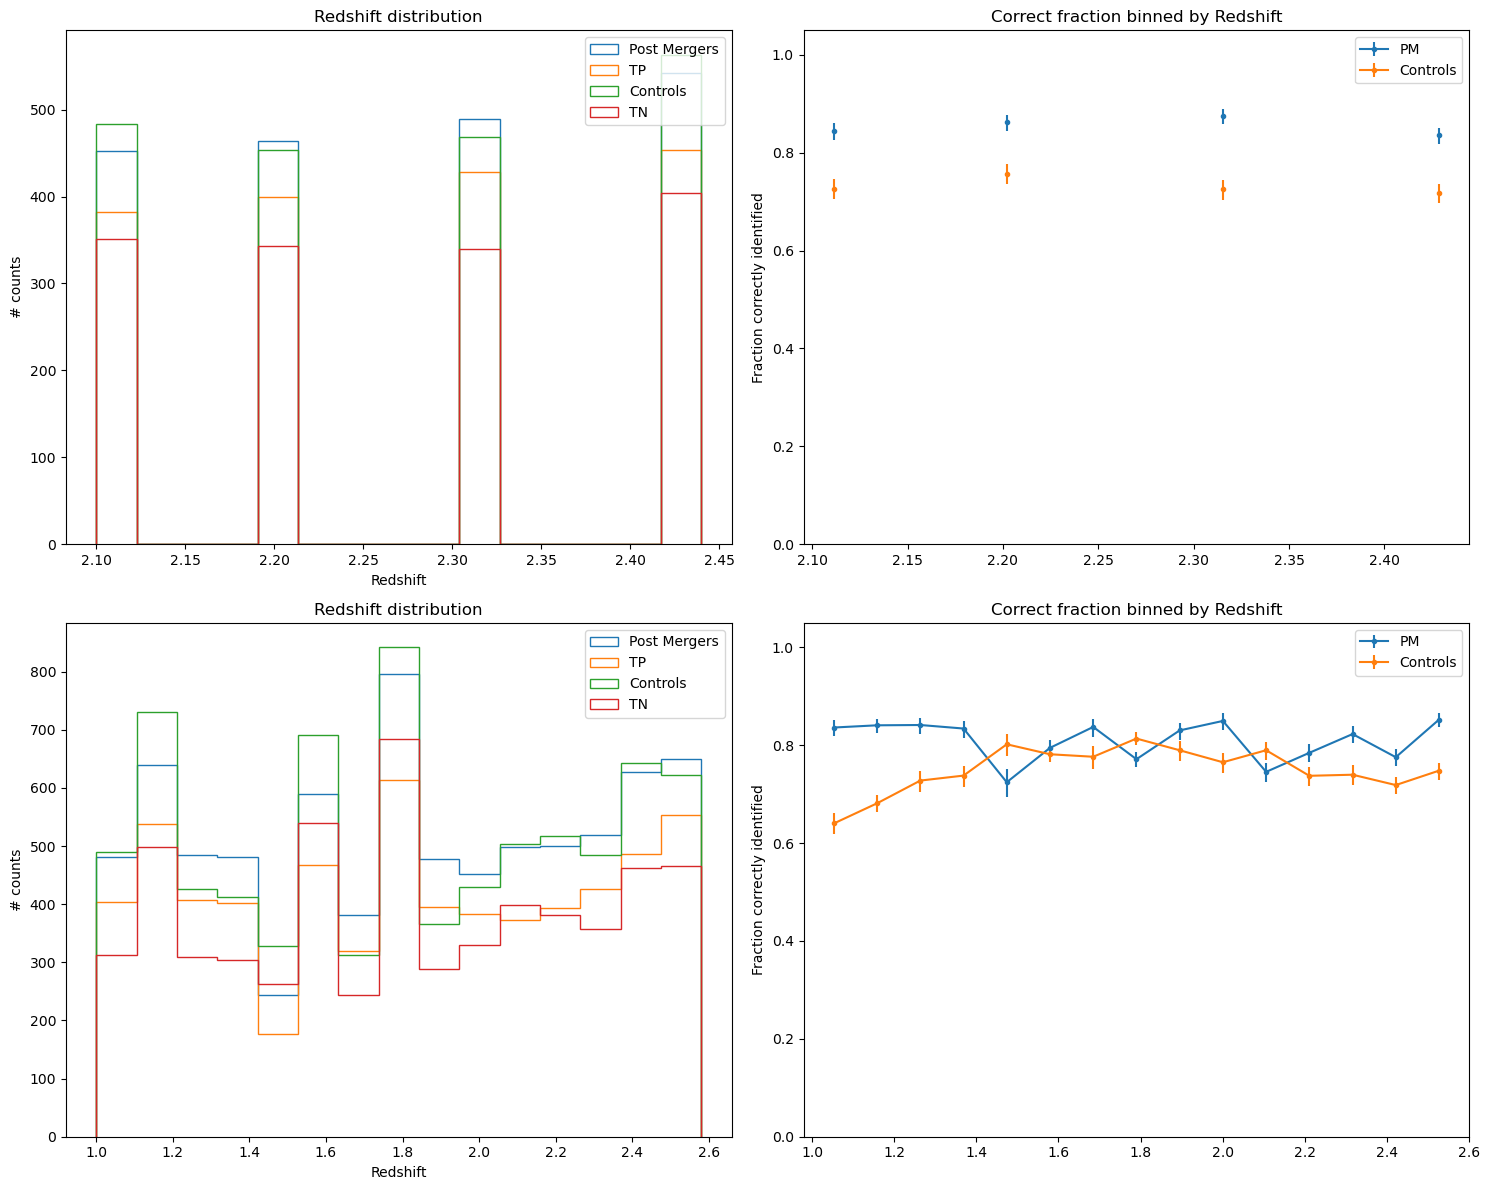

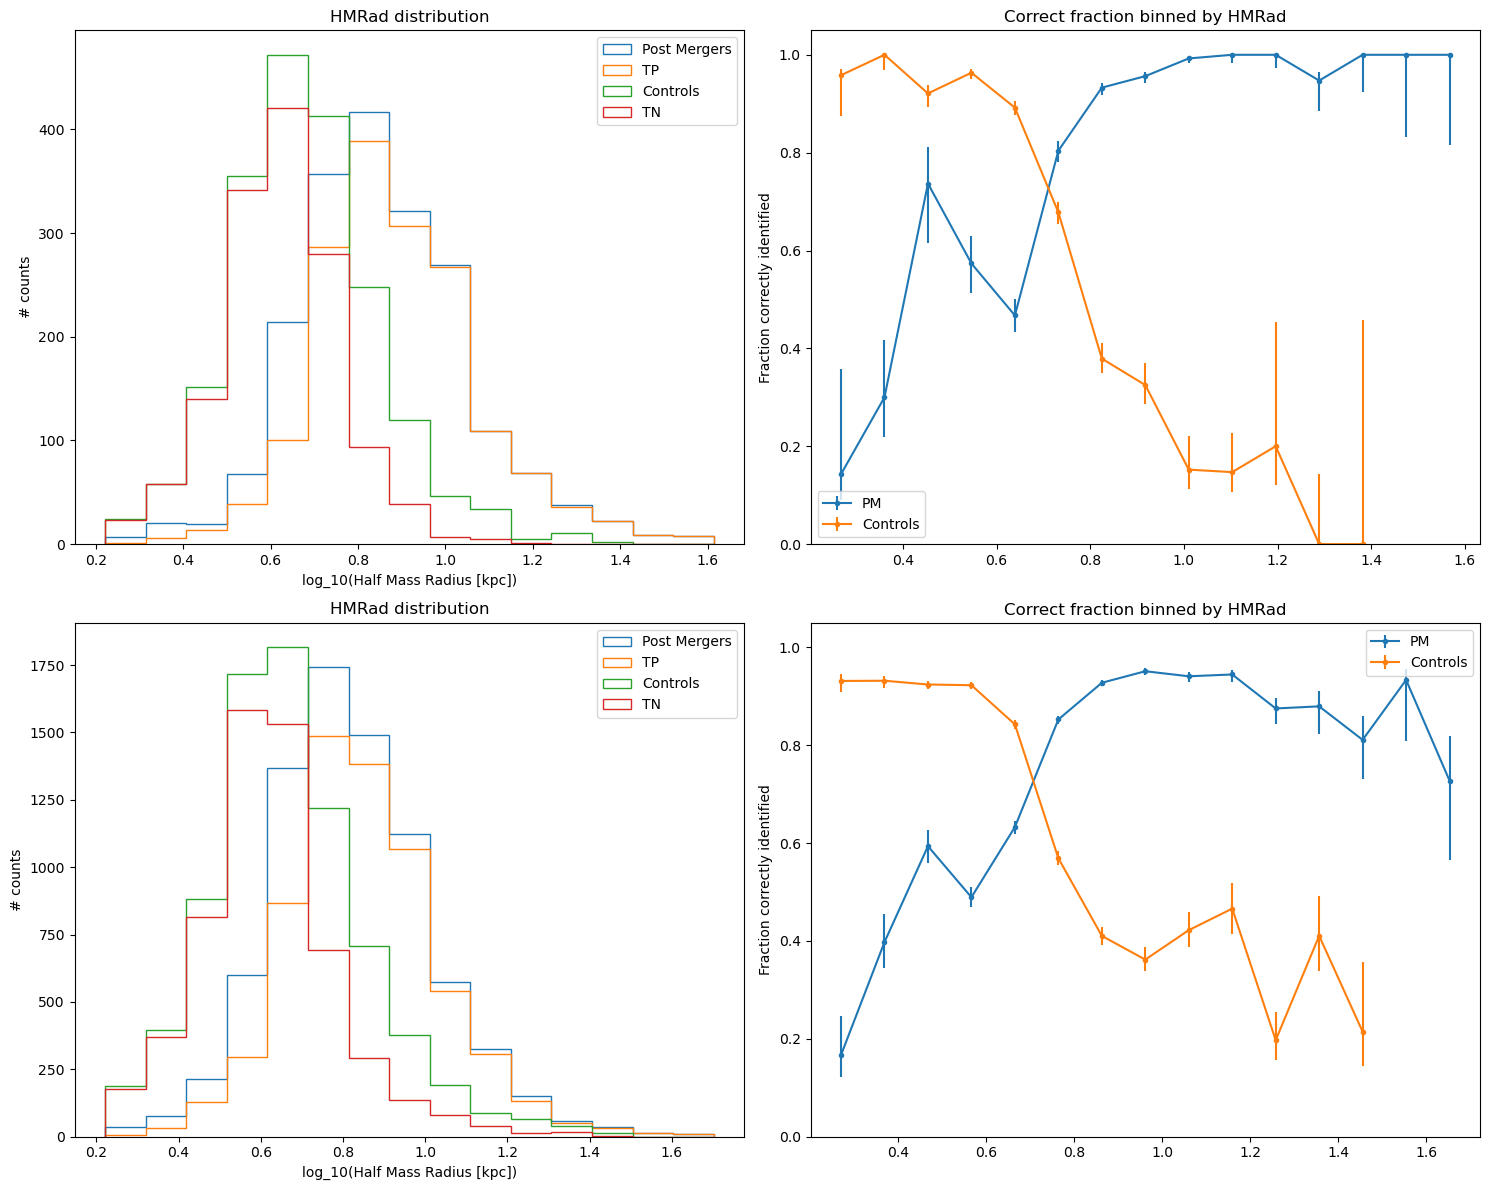

In [9]:
results_list = [results_54, results_42]
plot_multi_results(results_list, params, no_log)

In [158]:
# Plot a few example galaxies from each population

fig = plt.figure(figsize = (10,20))
ax = fig.subplots(4,3)

conditions = d
for condition in conditions:
    
    for i in range(3):
        idx = np.random.randint(0, len(dfs[df]))
        hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(dfs[df]['SFID'][idx], dfs[df]['SnapNum'][idx]))
        ax[df,i].imshow(hdul[1].data[0])
        ax[df,i].set_title('Label = %01d, Pred Label = %.02f' %(dfs[df]['LABEL'][idx], dfs[df]['PRED_LABEL'][idx]))

[           SFID  SnapNum  Mstellar       MBH         MDM       Mgas  \
 0      326268.0     49.0  0.014933  0.000000    1.896915   0.168298   
 1      501028.0     44.0  0.018324  0.000107    5.155341   0.529885   
 2      401693.0     40.0  0.012923  0.000000    0.573321   0.063965   
 3       32175.0     35.0  9.181404  0.092052  539.761230  59.148537   
 4      126033.0     44.0  6.076739  0.017329  267.684906  37.030781   
 ...         ...      ...       ...       ...         ...        ...   
 14198  322996.0     33.0  0.072874  0.000085    9.319251   1.283821   
 14199  343178.0     29.0  0.015874  0.000142    5.600752   0.487539   
 14200    6575.0     29.0  6.178263  0.026965   84.567413   6.747950   
 14201       4.0     35.0  7.390371  0.047765    7.991107   0.028567   
 14202  296927.0     28.0  0.071279  0.000110    6.656391   0.583155   
 
              SFR         Z      HMRad     BHacc  ...  SFID_recent  \
 0       0.088420  0.004609   2.947429  0.000000  ...          0

In [21]:
results_4.loc[results_4['Mstellar'] > 100]

Empty DataFrame
Columns: [SFID, SnapNum, Mstellar, MBH, MDM, Mgas, SFR, Z, HMRad, BHacc, ratio_recent, dt_recent, SFID_recent, snap_recent, ratio_biggest, dt_biggest, SFID_biggest, snap_biggest, Redshift, GAS_FRAC, PRED_LABEL, LABEL]
Index: []

[0 rows x 22 columns]

1696
1457
252410.0 34.0
731
443
32005.0 29.0
1341
531
376449.0 41.0
360
24
377860.0 43.0
709
216
312571.0 29.0
434
155
302782.0 30.0
300
92
130642.0 32.0
67
18
168345.0 31.0
171
13
188550.0 28.0
123
0
205891.0 34.0
73
4
106788.0 50.0
22
15
70149.0 49.0


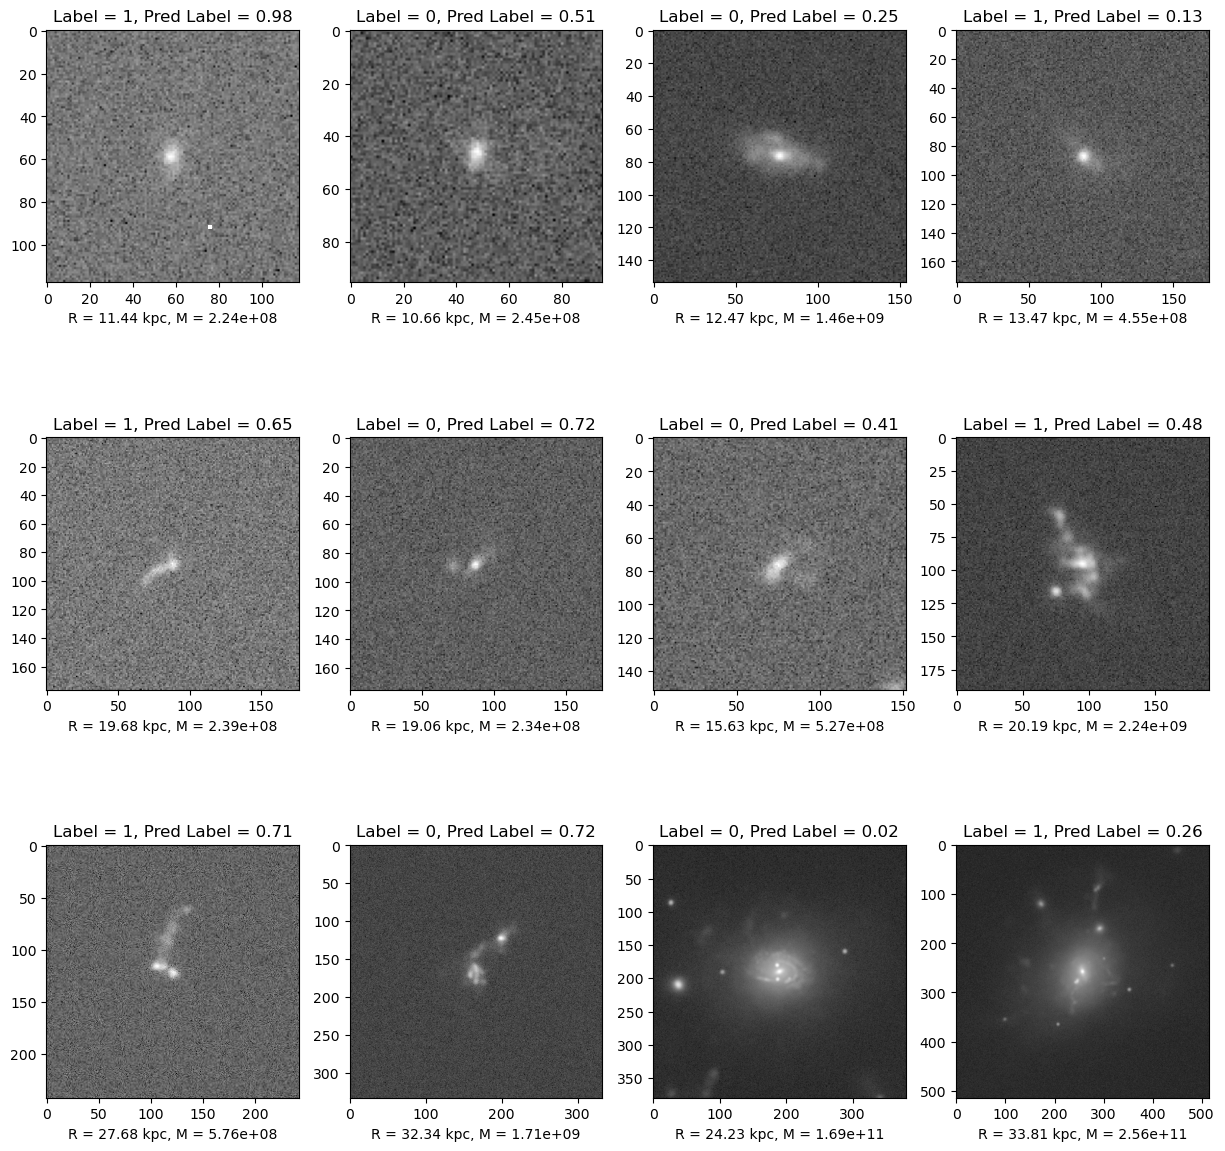

In [52]:
# Plot a few example galaxies from each population

dfs = [TP, FP, TN, FN]

mass_lims_list = [[5, 10], [20, 25], [25, 45], [45, 75]]
hm_rad_lims = [[6.3, 10], [10, 16], [16, 25]]

fig = plt.figure(figsize = (15,5 * len(hm_rad_lims)))
ax = fig.subplots(len(hm_rad_lims),4)

for j, hm_rad_lims in enumerate(hm_rad_lims):

    for i, df in enumerate(dfs):
        df_filt = df.loc[(df['HMRad'] > hm_rad_lims[0]) & (df['HMRad'] < hm_rad_lims[1])].reset_index(drop = True)
        print(len(df_filt))
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            print(idx)
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            print(df_filt['SFID'][idx], df_filt['SnapNum'][idx])
            ax[j,i].imshow(hdul[1].data[0], cmap = 'gray_r')
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_LABEL'][idx]))
            ax[j,i].set_xlabel('R = %.2f'%(df_filt['HMRad'][idx] / 0.7) + ' kpc, M = %.2e'%(df_filt['Mstellar'][idx] * 1e10))

637
55
637
187
637
172
637
560
637
454
637
481
637
33
637
404
132
38
132
74
132
23
132
35
132
117
132
111
132
78
132
79


/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you

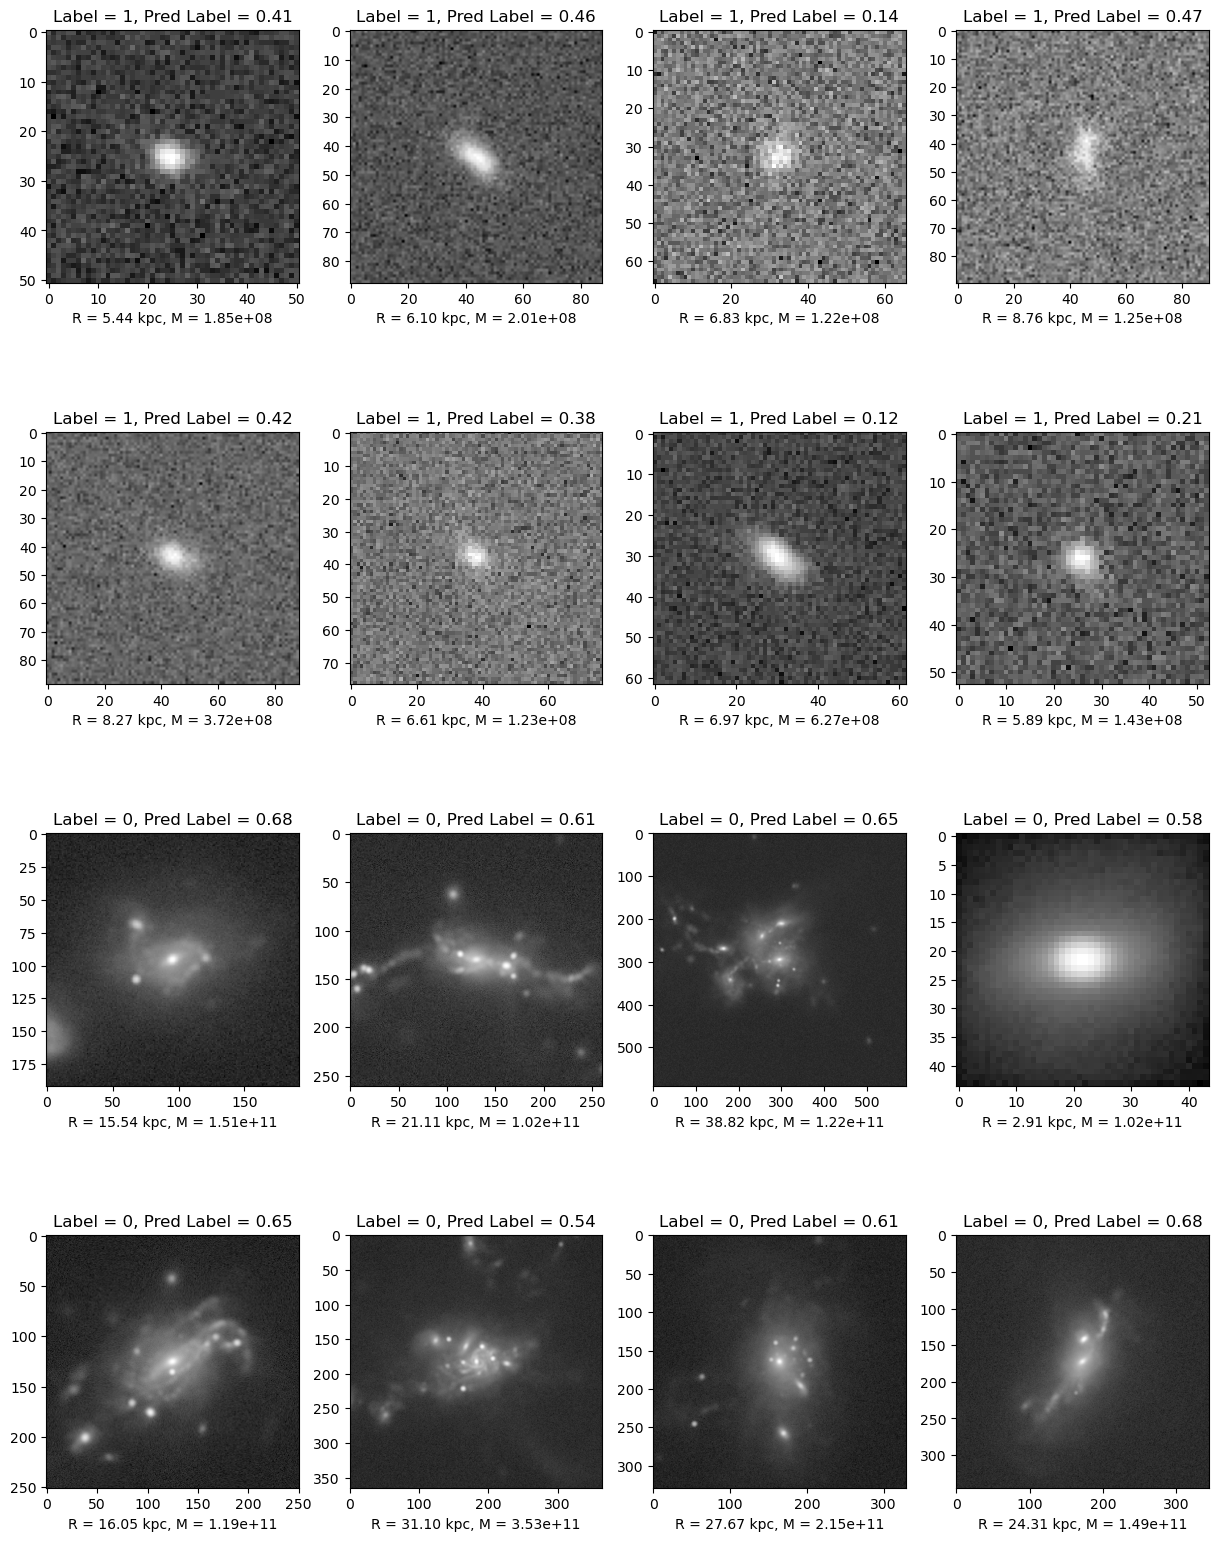

In [13]:
# Plot a few example galaxies from each population

#dfs = [FN, FN, FP, FP]

mass_lims_list = [[5, 10], [20, 25], [25, 45], [45, 75]]

mass_lims_list = [[0.01, 0.1, [FN, FN, FN, FN]], [0.01, 0.1, [FN, FN, FN, FN]], [10, 100, [FP, FP, FP, FP]], [10, 100, [FP, FP, FP, FP]]]


fig = plt.figure(figsize = (15,5 * len(mass_lims_list)))
ax = fig.subplots(4,4)

for j, mass_lims in enumerate(mass_lims_list):
    dfs = mass_lims[2]
    for i, df in enumerate(dfs):
        df_filt = df.loc[(df['Mstellar'] > mass_lims[0]) & (df['Mstellar'] < mass_lims[1])].reset_index(drop = True)
        print(len(df_filt))
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            print(idx)
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            img = np.array([hdul[1].data[0][0], hdul[2].data[0][0], hdul[3].data[0][0]])
            ax[j,i].imshow(hdul[1].data[0], cmap = 'gray_r')
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_LABEL'][idx]))
            ax[j,i].set_xlabel('R = %.2f'%(df_filt['HMRad'][idx] / 0.7) + ' kpc, M = %.2e'%(df_filt['Mstellar'][idx] * 1e10))

In [18]:
G = 6.6743e-11 #m^3 kg^-1 s^-2
c = 3e8 #ms^-1
mp = 1.673e-27 #kg
sigma_e = 6.65e-29 #m^2

L = results['BHacc'] * 0.1 * c**2 / (0.978e9 * 3.154e7) * 0.7 # (1e10 Msol/h) m^2 s^-3
Ledd = 4*np.pi*G*c*mp/sigma_e * results['MBH'] # (1e10 Msol/h) m^2 s^-3
results['edd_ratio'] = L/Ledd


In [23]:
results['edd_ratio'] = L/Ledd

In [25]:
results.loc[results['edd_ratio'] > 0]

SFID  SnapNum  Mstellar       MBH         MDM       Mgas  \
1      501028.0     44.0  0.018324  0.000107    5.155341   0.529885   
3       32175.0     35.0  9.181404  0.092052  539.761230  59.148537   
4      126033.0     44.0  6.076739  0.017329  267.684906  37.030781   
6      104829.0     36.0  9.650011  0.043964  196.124908  11.123857   
7      373176.0     35.0  0.053103  0.000130    8.332370   1.006258   
...         ...      ...       ...       ...         ...        ...   
14198  322996.0     33.0  0.072874  0.000085    9.319251   1.283821   
14199  343178.0     29.0  0.015874  0.000142    5.600752   0.487539   
14200    6575.0     29.0  6.178263  0.026965   84.567413   6.747950   
14201       4.0     35.0  7.390371  0.047765    7.991107   0.028567   
14202  296927.0     28.0  0.071279  0.000110    6.656391   0.583155   

             SFR         Z      HMRad     BHacc  ...  snap_recent  \
1       0.208660  0.002947   5.071070  0.000022  ...         43.0   
3       9.953035  0.007798  13.284450  0.000151  ...         34.0   
4      58.397652  0.032687   7.069012  0.018627  ...         44.0   
6       3.950370  0.017705   7.511624  0.000145  ...         36.0   
7       1.237709  0.004568   4.744802  0.000035  ...          0.0   
...          ...       ...        ...       ...  ...          ...   
14198   1.712777  0.004353   8.320958  0.000035  ...         33.0   
14199   0.751502  0.002647   5.990407  0.000028  ...         28.0   
14200  16.904078  0.022334  10.301189  0.000406  ...          0.0   
14201   0.047978  0.019966   2.327773  0.000208  ...          0.0   
14202   0.887610  0.007467   4.392513  0.000030  ...          0.0   

       ratio_biggest  dt_biggest  SFID_biggest  snap_biggest  Redshift  \
1           0.128202       0.164      322150.0          43.0      1.25   
3           0.022802       0.146       30986.0          34.0      1.82   
4           0.153283       0.000      126033.0          44.0      1.25   
6           0.413230       0.151       91188.0          35.0      1.74   
7           0.000000       0.000           0.0           0.0      1.82   
...              ...         ...           ...           ...       ...   
14198       0.171772       0.000      322996.0          33.0      2.00   
14199       0.195552       0.146      328281.0          28.0      2.44   
14200       0.000000       0.000           0.0           0.0      2.44   
14201       0.000000       0.000           0.0           0.0      1.82   
14202       0.000000       0.000           0.0           0.0      2.58   

        GAS_FRAC  PRED_LABEL  LABEL  edd_ratio  
1      28.917360    0.641035    1.0   0.006689  
3       6.442210    0.415513    0.0   0.000053  
4       6.093857    0.756333    1.0   0.034681  
6       1.152730    0.995163    1.0   0.000106  
7      18.949003    0.128657    0.0   0.008709  
...          ...         ...    ...        ...  
14198  17.616946    0.752252    1.0   0.013134  
14199  30.713230    0.569232    1.0   0.006282  
14200   1.092208    0.549171    0.0   0.000486  
14201   0.003865    0.080427    0.0   0.000141  
14202   8.181259    0.005079    0.0   0.008955  

[12149 rows x 23 columns]

In [19]:
params = ['Mstellar', 'Redshift', 'HMRad', 'Edd_ratio', 'Mass/radius**2']

#params = ['Mstellar', 'Redshift', 'MBH', 'MDM', 'Mgas', 'SFR', 'Z',
#       'HMRad', 'BHacc', 'GAS_FRAC']

no_log = ['Redshift', 'ratio_recent', 'Z', 'ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest','GAS_FRAC']

scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'HMRad' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1}
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)'}
title_labels = {0: '(No High M boosting or HMR matching)', 1: '(With high mass boosting)' , 2: '(With High M boosting + HMR Matching)', 3: ''}

def plot_multi_results_edd_ratio(results_list, params, no_log):
    

    for param in params:
        
        fig = plt.figure(figsize = (15,6 * len(results_list)))
        ax = fig.subplots(len(results_list),2)
        
        probs = []
        
        for i, results in enumerate(results_list):
            
            if param == 'Edd_ratio':
                results = results.loc[results['Edd_ratio'] > 1e-6]
                #try:
                 #   results = results.loc[results['edd_ratio'] > 1e-6]
                #except:
                #   results = results.loc[results['Edd_ratio'] > 1e-6]
                  #  param = 'Edd_ratio'
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][param].values, bins = 15, histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results.loc[results['LABEL'] == 0][param].values, bins = edges_M, histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TN')

            else:
                # Create variable with log(results) and set -inf = 0

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][param].values * scale[param])

                
                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                

                counts_M_total, edges_M, bars = ax[i,0].hist(results_M_total, bins = 15, histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, bins = edges_M, histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,0].hist(results_NM, bins = edges_M, histtype = 'step', label = 'TN')
                
                
                #counts_M_total, edges_M, bars = ax[i,0].hist(np.log10(results.loc[results['LABEL'] == 1][params[i]].values * 1e10), bins = 15, histtype = 'step', label = 'Post Mergers')
                #counts_M, edges, bars = ax[i,0].hist(np.log10(TP[params[i]].values * 1e10), bins = edges_M, histtype = 'step', label = 'TP')
                #counts_NM_total, edges_NM, bars = ax[i,0].hist(np.log10(results.loc[results['LABEL'] == 0][params[i]].values * 1e10), bins = 15, histtype = 'step', label = 'Controls')
                #counts_NM, edges, bars = ax[i,0].hist(np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)][params[i]].values * 1e10), bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for j in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_LABEL'] > 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_LABEL'] < 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_LABEL'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            ax[i,0].set_title(param + ' distribution' + ' %s'%(title_labels[i]))
            ax[i,0].set_ylabel('# counts')
            ax[i,0].set_xlabel(xlabels[param])
            ax[i,0].legend()
            
            probs.append([probs_M_total, probs_M, probs_NM_total, probs_NM, bin_edges])


            centers = 0.5*(edges[1:]+ edges[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            ax[i,1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[i,1].errorbar(centers, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            ax[i,1].set_ylabel('Fraction correctly identified')
            ax[i,1].set_title('Correct fraction binned by ' + param + ' %s'%(title_labels[i]))
            ax[i,1].set_ylim(0, 1.05)
            ax[i,1].set_xlabel(xlabels[param])
            ax[i,1].legend()


        #plt.hist(np.log10(false.Mstellar.values), histtype = 'step', density = True)
        plt.tight_layout()

    #return np.array(probs), centers

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in true

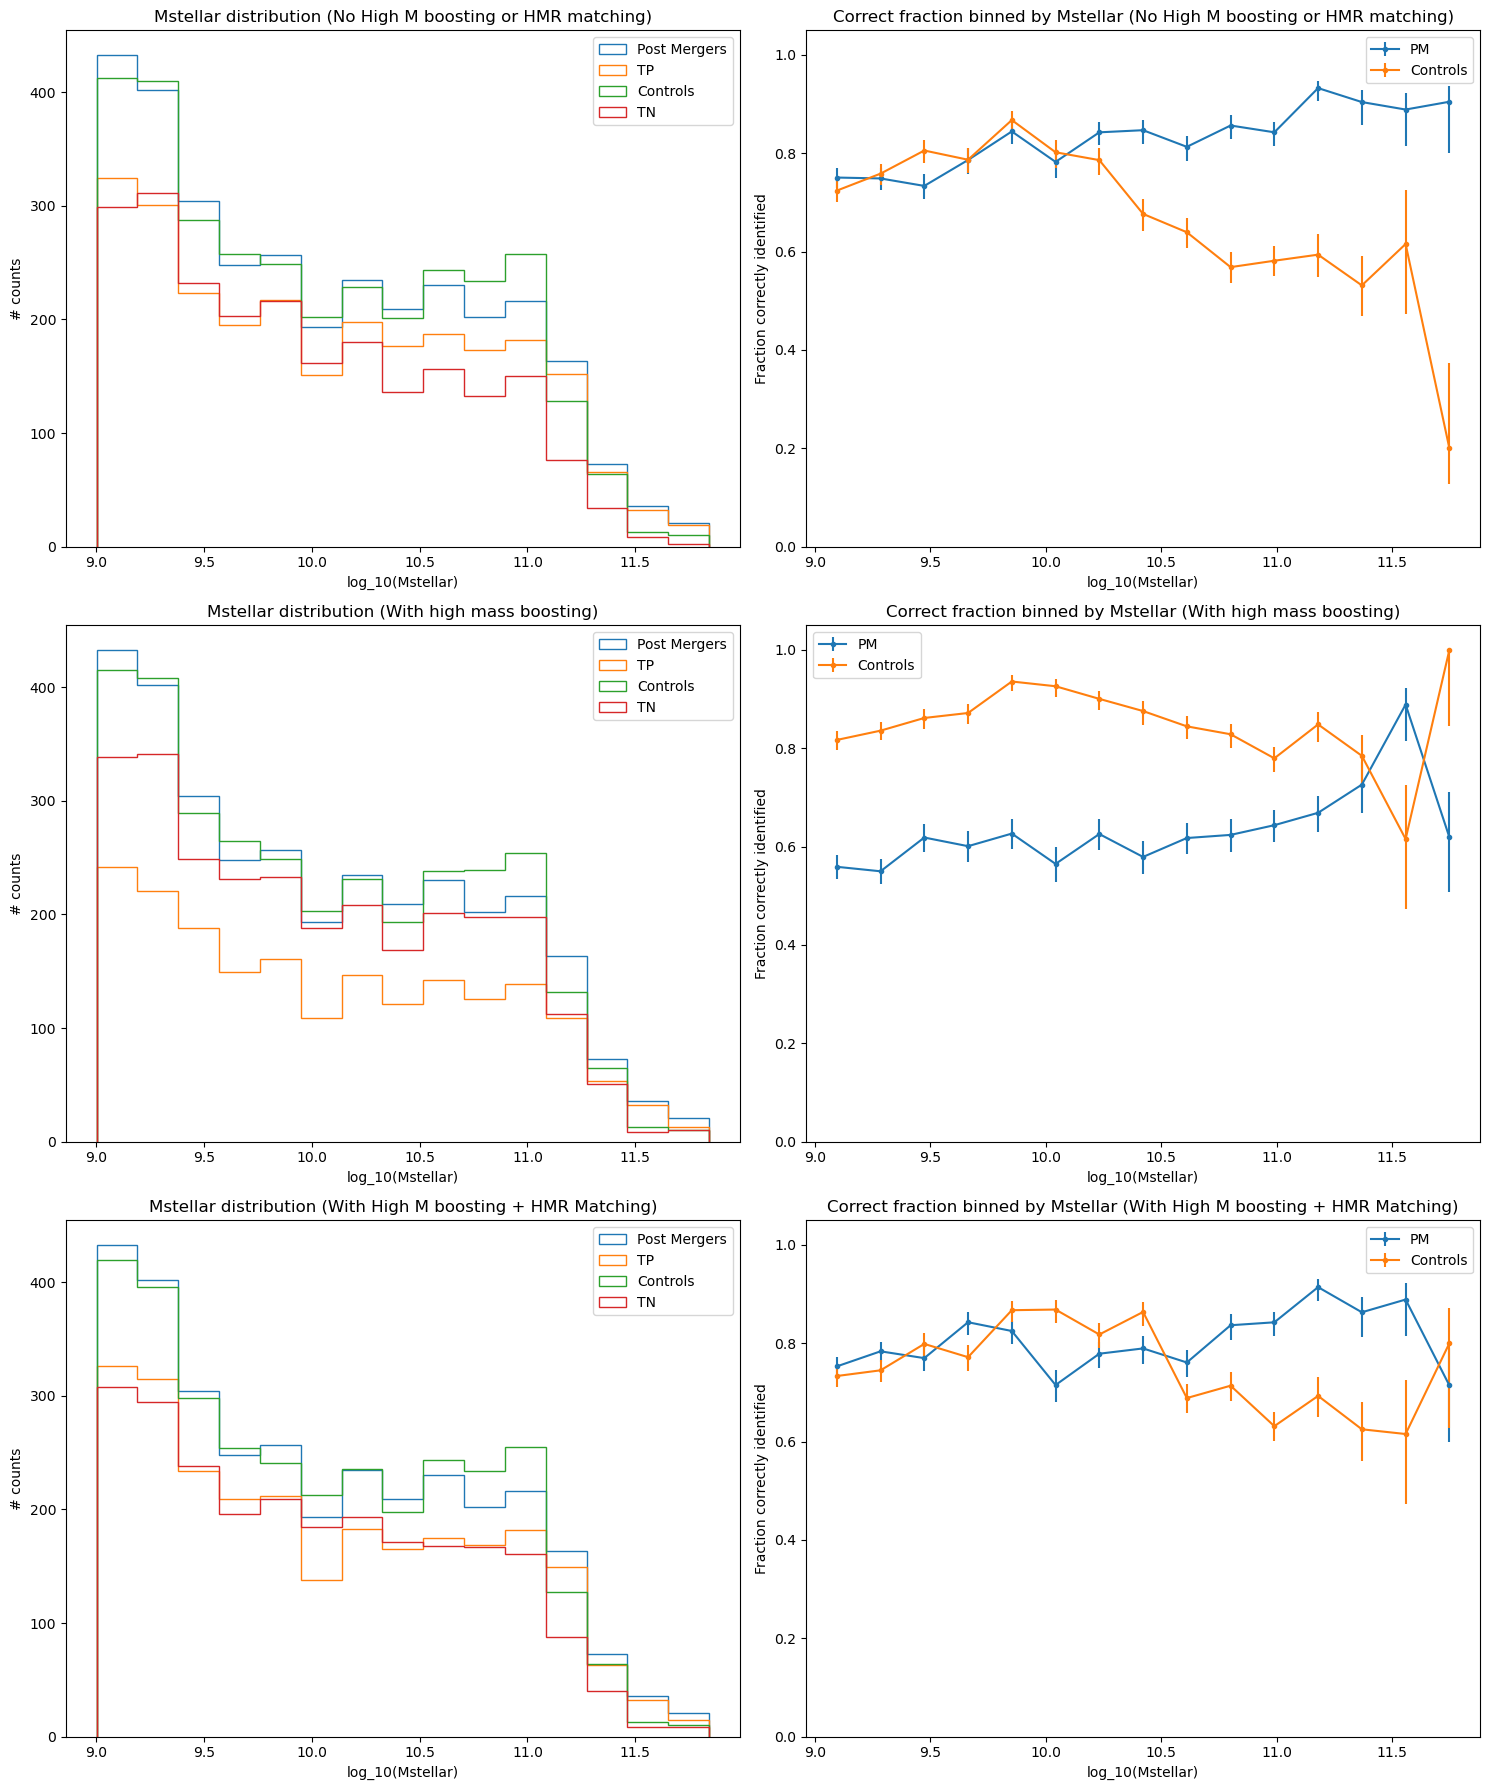

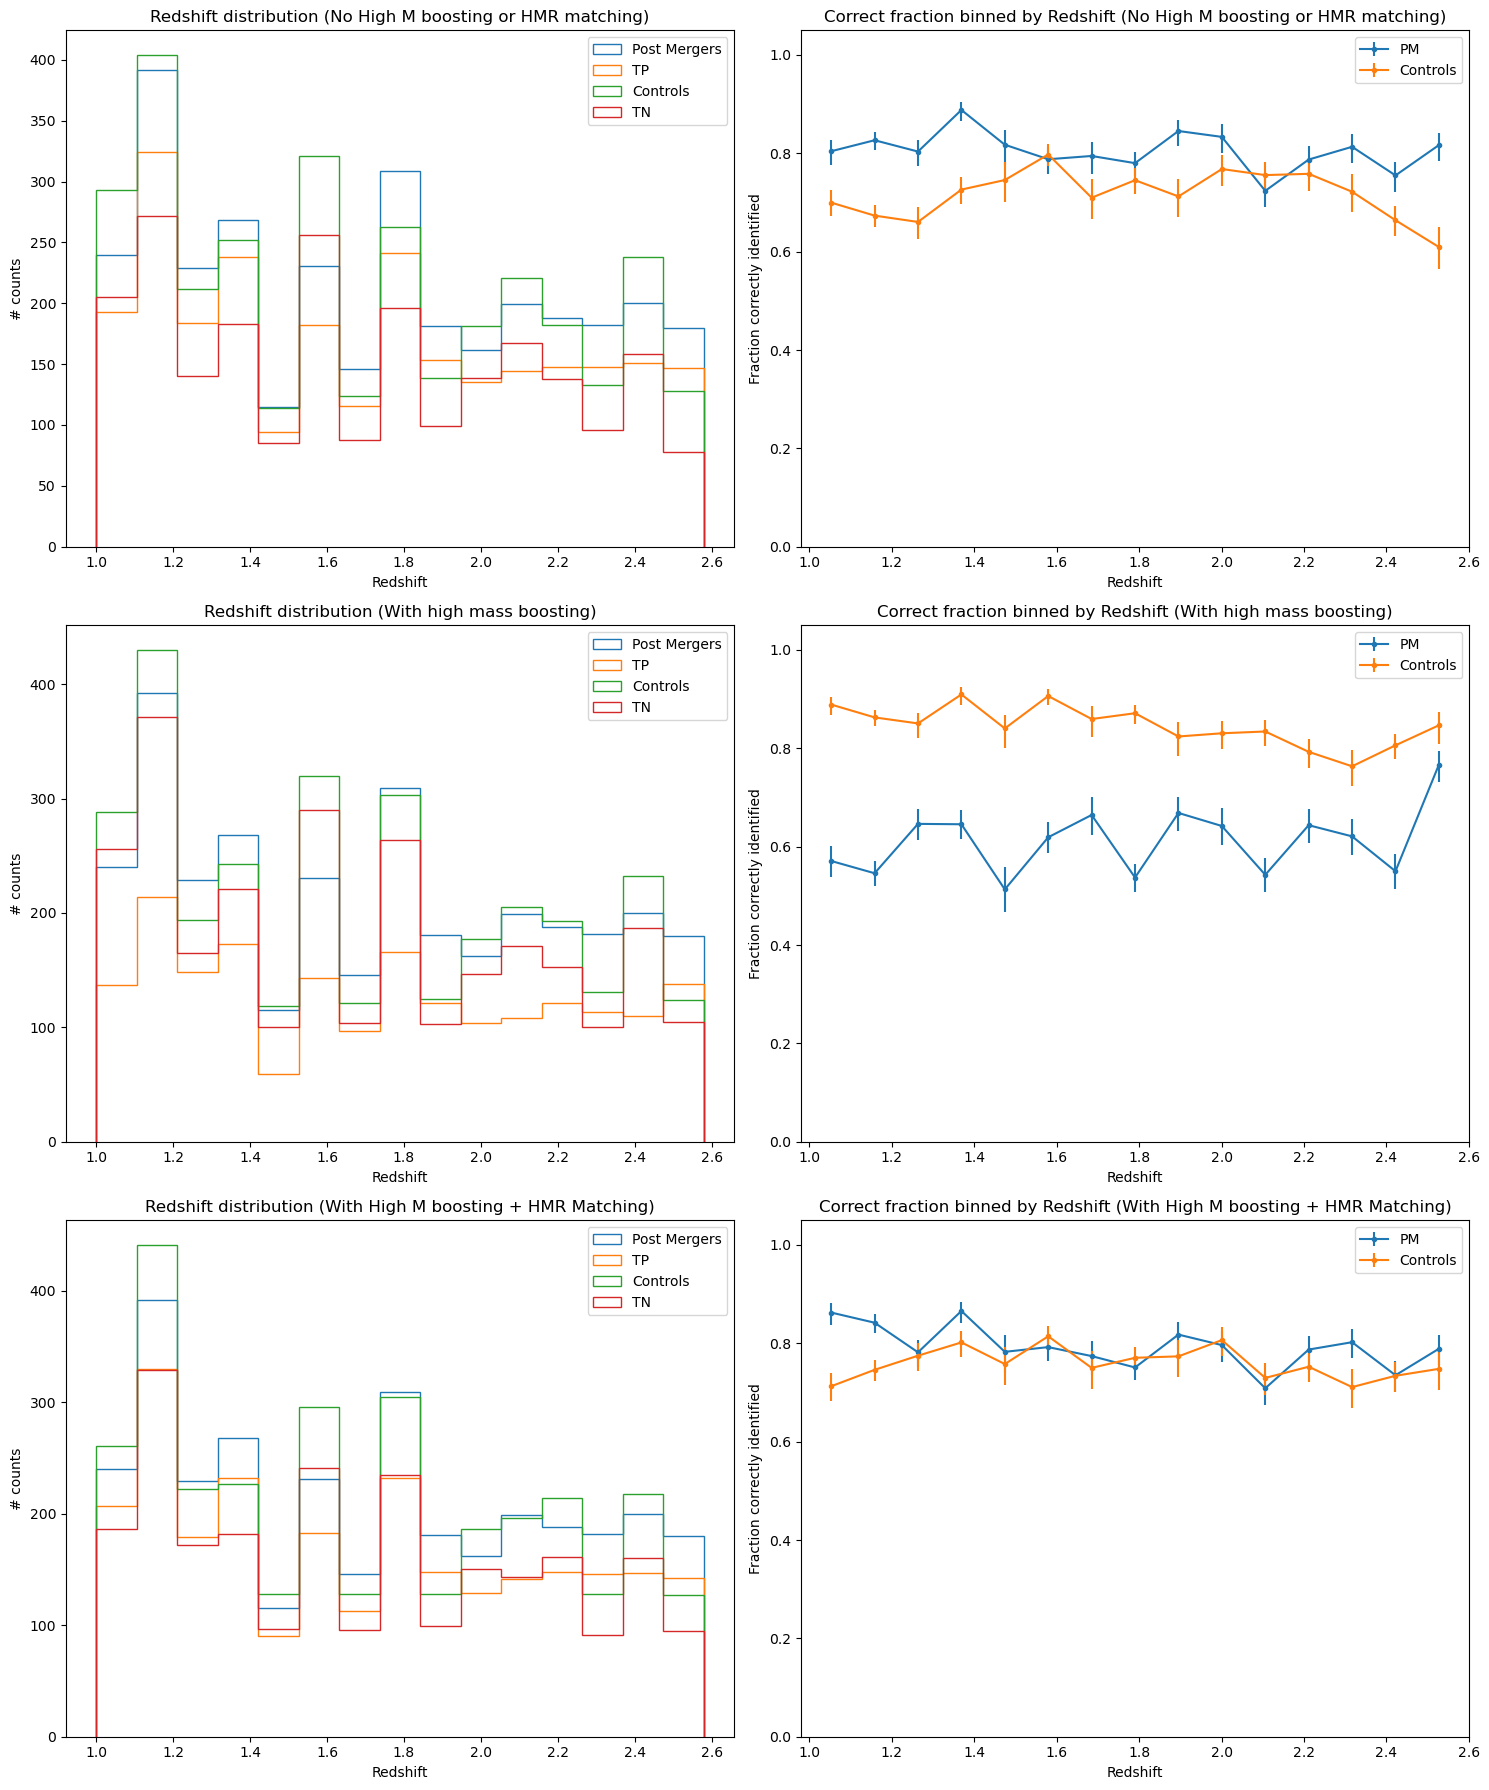

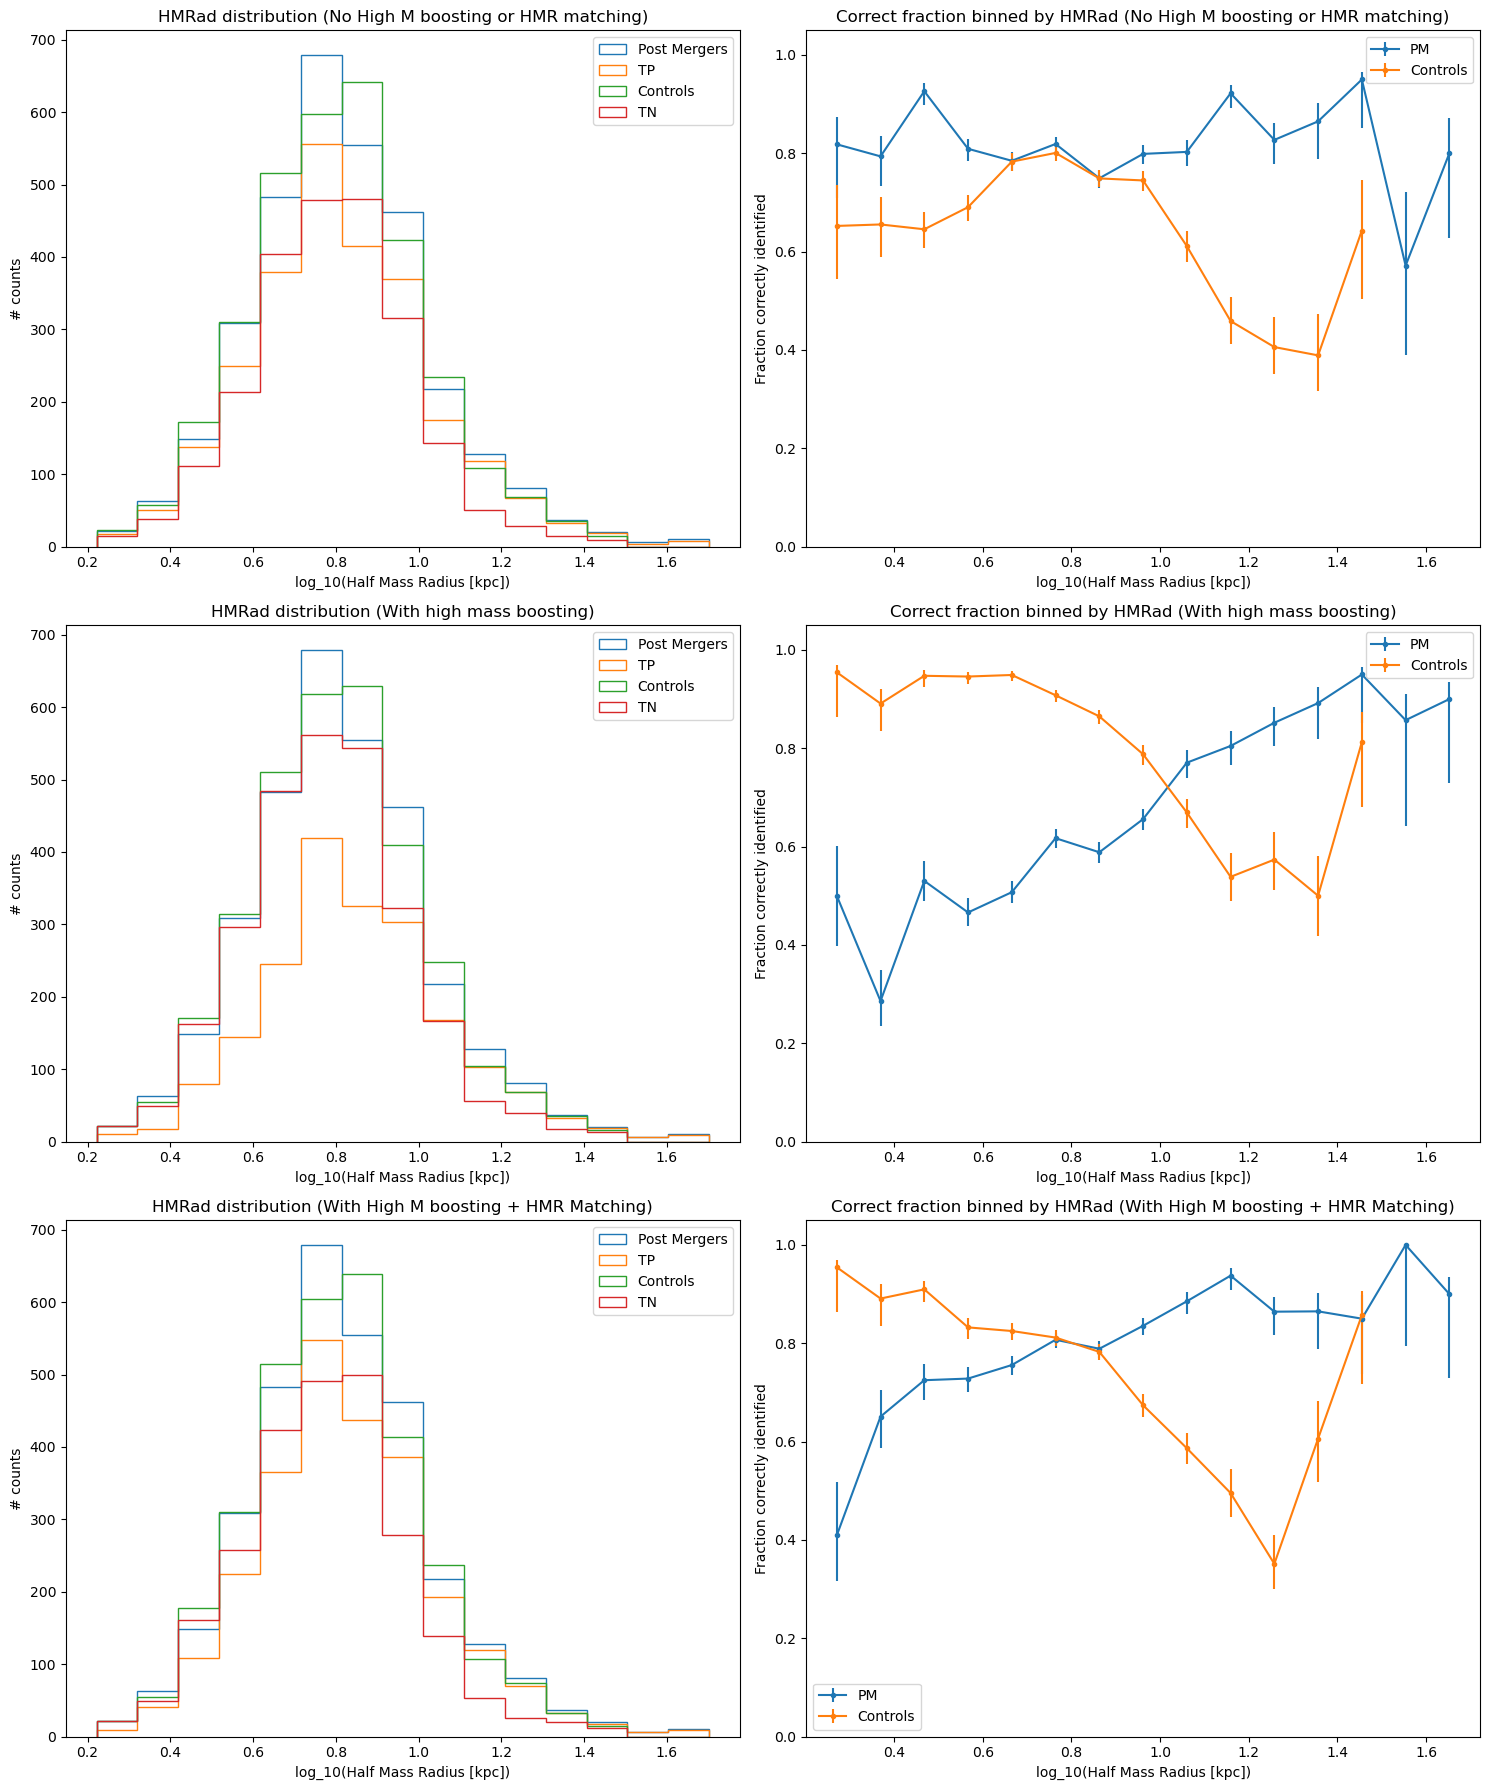

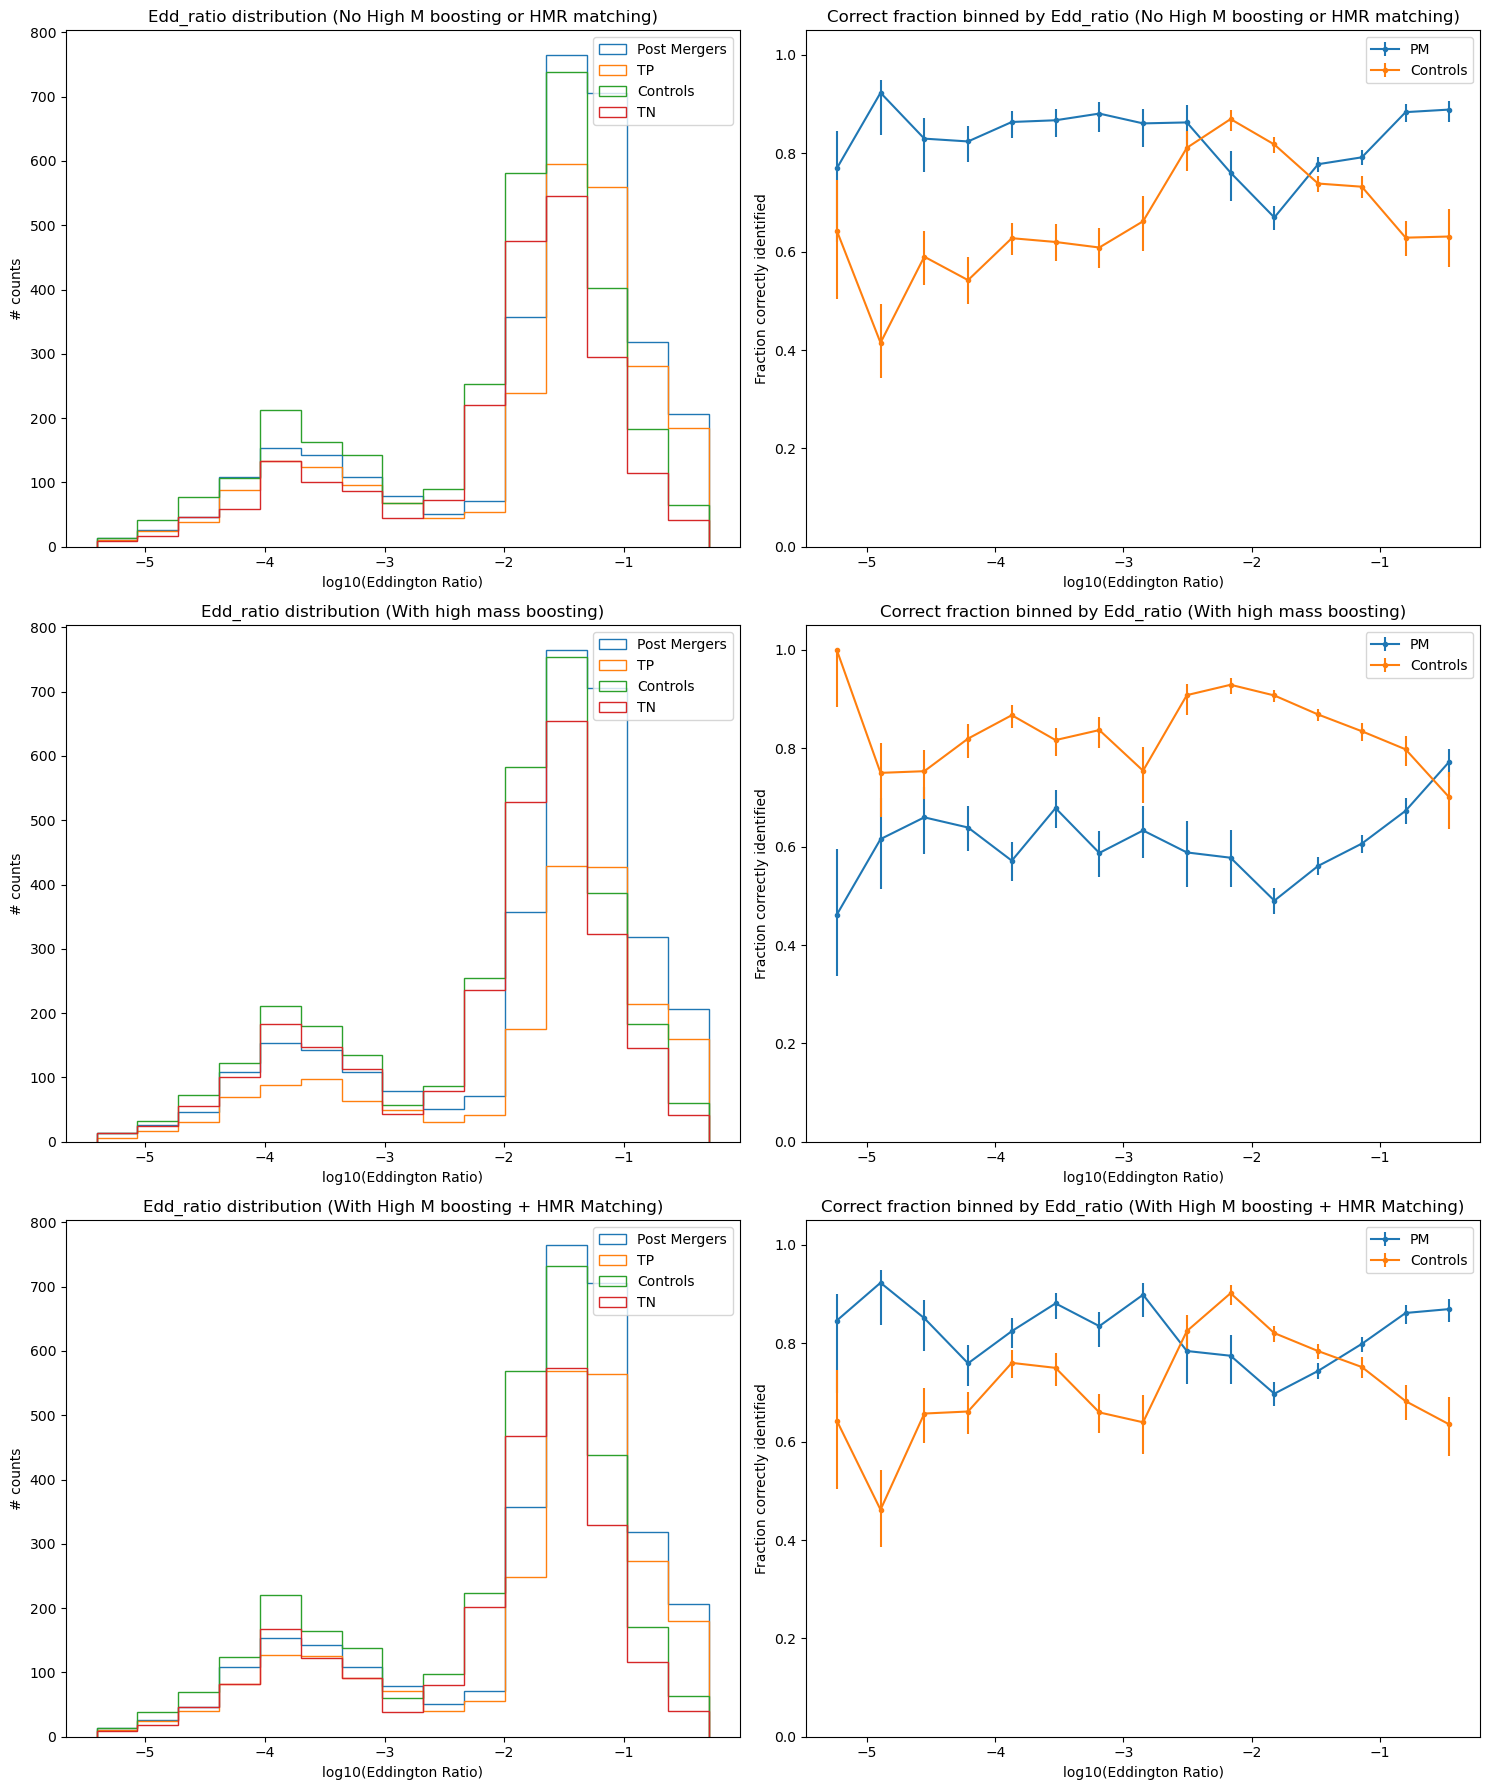

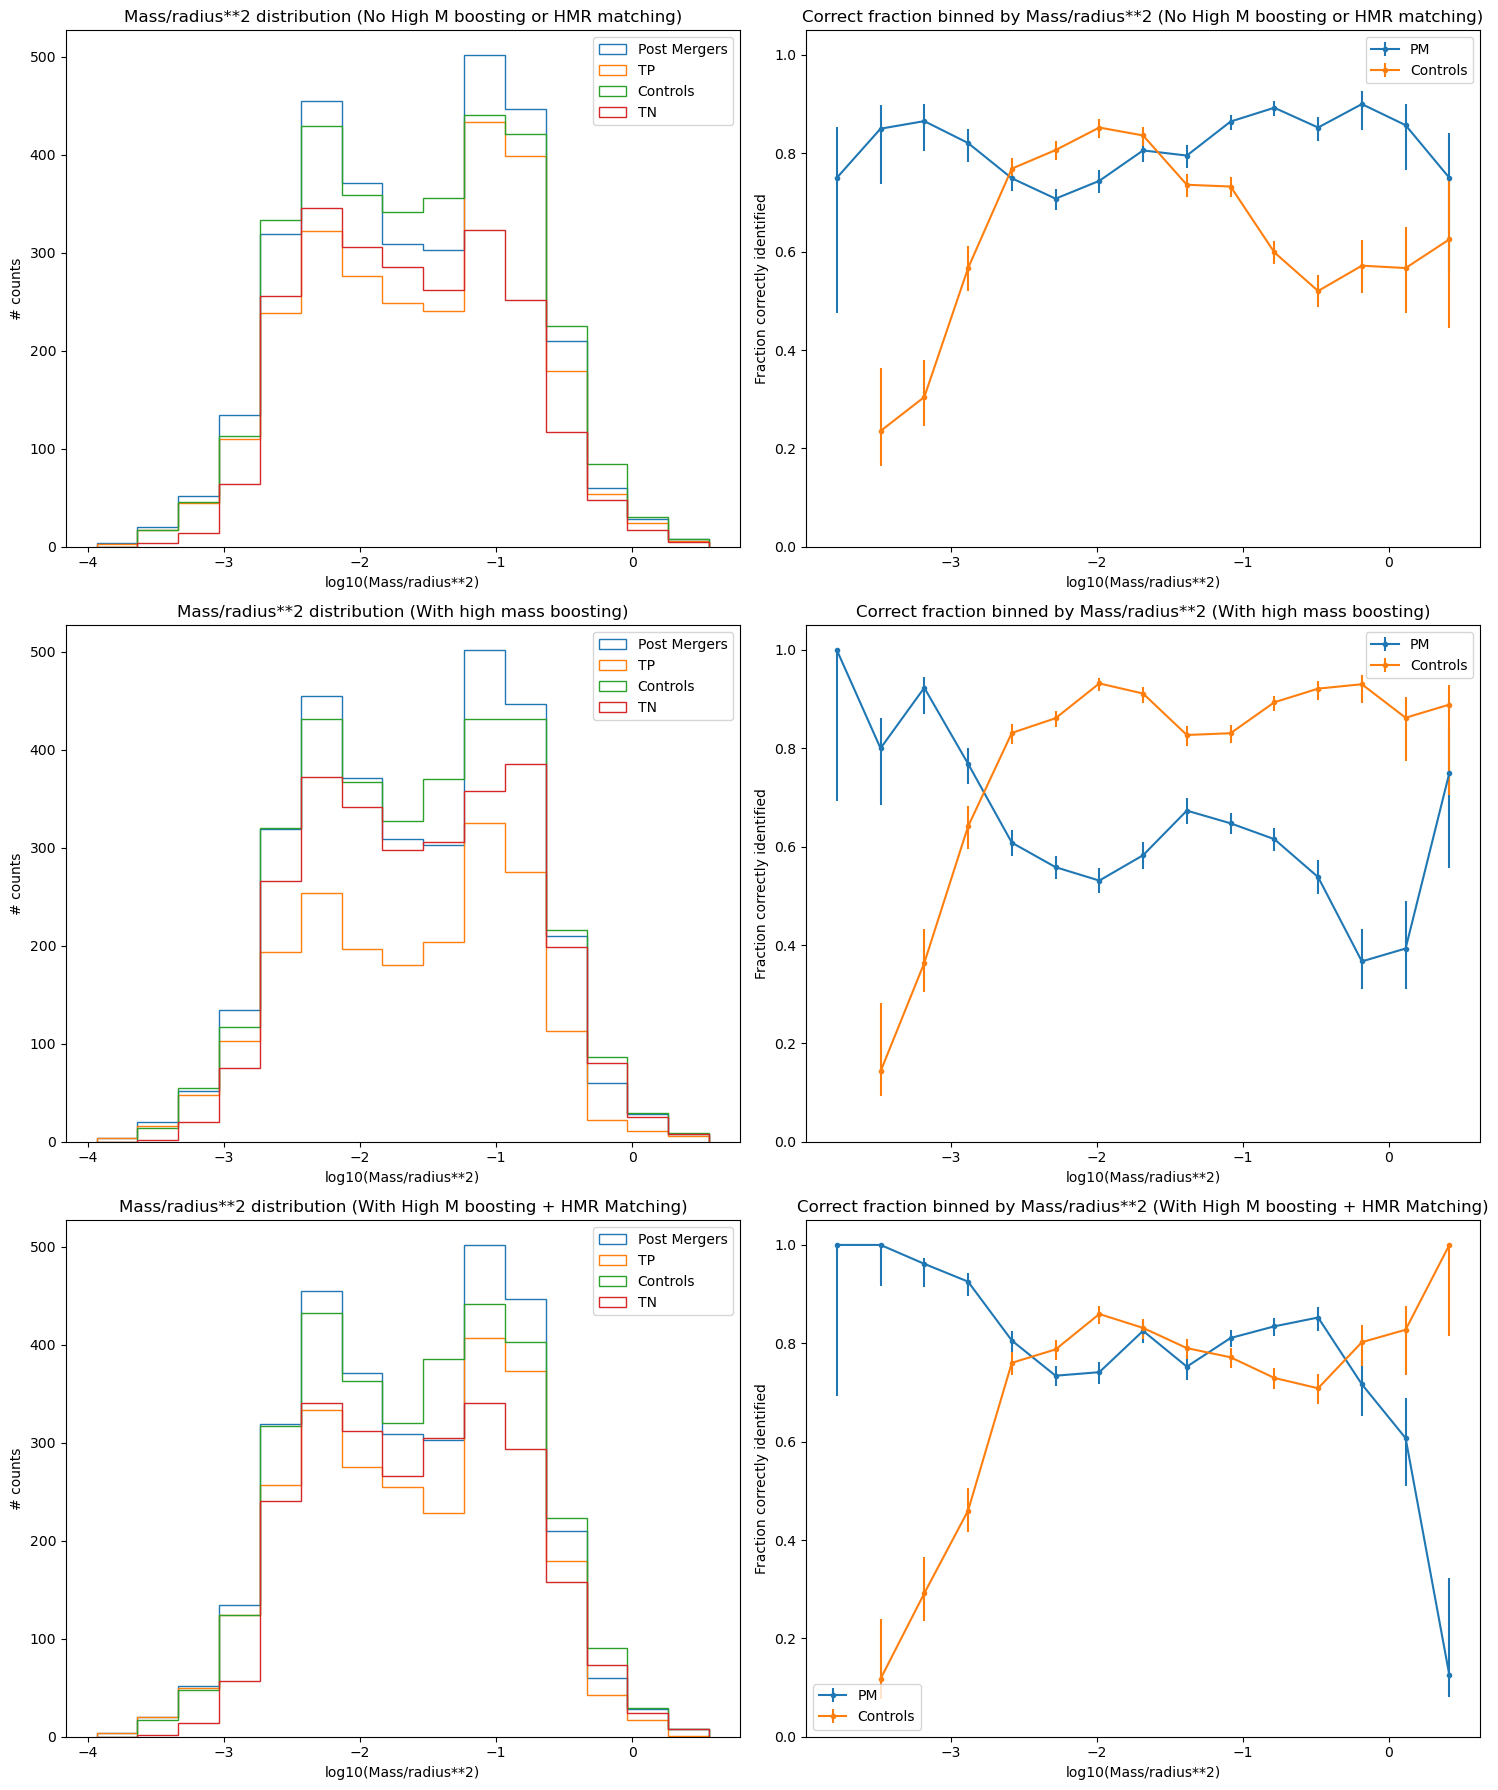

In [20]:
#results_list = [results_42, results_93, results_97]
plot_multi_results_edd_ratio(results_list.values(), params, no_log)

In [18]:
for results in results_list.values():
    results['Mass/radius**2'] = results['Mstellar'] / results['HMRad'] ** 2


In [21]:
run_info

RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
65     111        50         50  0.540541   0.385385  0.778143  0.748117   
69     115        50         50  0.287287   0.143143  0.808599  0.803006   
73     117        50         50  0.498498   0.371371  0.797521  0.781494   

    TRA_LOSS  VAL_LOSS  TEST_SIZE_TRN  ...  ratio_merger  dt_merger  \
65  0.461419  0.488800            0.3  ...           0.1        0.2   
69  0.407806  0.412303            0.3  ...           0.1        0.2   
73  0.428781  0.446625            0.3  ...           0.1        0.2   

    ratio_nonmerger  dt_nonmerger  snap_lower  snap_upper  \
65              0.1           1.0          28          50   
69              0.1           1.0          28          50   
73              0.1           1.0          28          50   

                   gal_params              grab_list_name  boost_massive_gals  \
65  [Mstellar, 0.1, 10000000]  grablist_run_00111.parquet                True   
69  [Mstellar, 0.1, 10000000]  grablist_run_00113.parquet                True   
73  [Mstellar, 0.1, 10000000]  grablist_run_00117.parquet                True   

    random_state  
65            42  
69            42  
73            42  

[3 rows x 25 columns]

In [38]:
edd_ratio_0 = results_31.loc[results_31['Edd_ratio'] == 0]

In [40]:
edd_ratio_0.loc[edd_ratio_0['Mstellar'] > 0.1]

SFID  SnapNum  Mstellar  MBH         MDM       Mgas        SFR  \
119      4860.0     48.0  0.902355  0.0    0.488890   0.000000   0.000000   
201     82611.0     30.0  2.060375  0.0   87.465874  11.000012  23.128397   
231    353994.0     41.0  0.161271  0.0   16.367968   2.463957   3.064948   
271    180700.0     33.0  0.373394  0.0   32.838062   4.799210  10.332028   
274    267031.0     41.0  0.472629  0.0   26.519394   3.214296   6.000560   
...         ...      ...       ...  ...         ...        ...        ...   
15321  344405.0     43.0  0.162729  0.0   22.851452   3.254912   3.024837   
15487  216513.0     39.0  0.808996  0.0   36.800755   3.908409  11.111057   
15512   89242.0     30.0  0.477401  0.0    0.372103   0.339538  10.597979   
15521   87116.0     37.0  6.467225  0.0  266.220764  13.457495  23.132080   
15552   12479.0     43.0  0.477002  0.0    0.656235   0.000000   0.000000   

              Z      HMRad  BHacc  ...  snap_recent  ratio_biggest  \
119    0.000000   1.476610    0.0  ...          0.0       0.000000   
201    0.015853   7.677252    0.0  ...         30.0       0.250353   
231    0.004632  12.312964    0.0  ...         41.0       0.270388   
271    0.008276  11.421844    0.0  ...         33.0       0.136247   
274    0.011274   8.885591    0.0  ...         41.0       1.000000   
...         ...        ...    ...  ...          ...            ...   
15321  0.004769  11.001076    0.0  ...         43.0       0.267590   
15487  0.015365   6.257523    0.0  ...         39.0       0.544335   
15512  0.030698   2.872935    0.0  ...          0.0       0.000000   
15521  0.014679   9.532701    0.0  ...          0.0       0.000000   
15552  0.000000   3.210807    0.0  ...          0.0       0.000000   

       dt_biggest  SFID_biggest  snap_biggest  Redshift   GAS_FRAC  \
119         0.000           0.0           0.0      1.07   0.000000   
201         0.000       82611.0          30.0      2.32   5.338839   
231         0.000      353994.0          41.0      1.41  15.278338   
271         0.156      173551.0          32.0      2.00  12.852942   
274         0.000      267031.0          41.0      1.41   6.800889   
...           ...           ...           ...       ...        ...   
15321       0.000      344405.0          43.0      1.30  20.001992   
15487       0.000      216513.0          39.0      1.53   4.831184   
15512       0.000           0.0           0.0      2.32   0.711220   
15521       0.000           0.0           0.0      1.67   2.080876   
15552       0.000           0.0           0.0      1.30   0.000000   

       PRED_LABEL  LABEL  Edd_ratio  
119      0.382958    0.0        0.0  
201      0.522425    1.0        0.0  
231      0.876123    1.0        0.0  
271      0.854429    1.0        0.0  
274      0.257349    1.0        0.0  
...           ...    ...        ...  
15321    0.999691    1.0        0.0  
15487    0.073149    1.0        0.0  
15512    0.034783    0.0        0.0  
15521    0.344677    0.0        0.0  
15552    0.005588    0.0        0.0  

[183 rows x 23 columns]

In [50]:
edd_ratio_0

SFID  SnapNum  Mstellar  MBH        MDM      Mgas       SFR  \
17     581030.0     41.0  0.010252  0.0   2.728079  0.225823  0.026258   
21     432758.0     28.0  0.011835  0.0   2.731112  0.168618  0.173358   
29      23925.0     30.0  0.099333  0.0   0.043479  0.000000  0.000000   
33      80208.0     41.0  0.059926  0.0   8.073010  1.079398  0.662612   
56     245015.0     31.0  0.014572  0.0   1.019238  0.114438  0.201825   
...         ...      ...       ...  ...        ...       ...       ...   
15578  493544.0     33.0  0.011669  0.0   2.951037  0.286490  0.147253   
15588  340717.0     35.0  0.078303  0.0  11.164092  1.466781  1.043432   
15610  501032.0     32.0  0.011857  0.0   2.581462  0.224726  0.093412   
15615  519678.0     37.0  0.011605  0.0   2.990978  0.323820  0.143597   
15621  465671.0     35.0  0.017535  0.0   3.070858  0.492686  0.136971   

              Z      HMRad  BHacc  ...  snap_recent  ratio_biggest  \
17     0.002147   4.379138    0.0  ...          0.0       0.000000   
21     0.003280   5.583210    0.0  ...         27.0       0.024000   
29     0.000000   1.281916    0.0  ...          0.0       0.000000   
33     0.003448  11.873811    0.0  ...         41.0       0.264735   
56     0.006024   3.573580    0.0  ...          0.0       0.000000   
...         ...        ...    ...  ...          ...            ...   
15578  0.003664   4.984900    0.0  ...         33.0       0.150945   
15588  0.003779  12.742661    0.0  ...         34.0       0.861829   
15610  0.004850   4.580930    0.0  ...         31.0       0.151783   
15615  0.003397   5.162113    0.0  ...         36.0       0.216077   
15621  0.003729   7.711910    0.0  ...         35.0       0.256257   

       dt_biggest  SFID_biggest  snap_biggest  Redshift   GAS_FRAC  \
17          0.000           0.0           0.0      1.41  22.026670   
21          0.155      420121.0          27.0      2.58  14.247528   
29          0.000           0.0           0.0      2.32   0.000000   
33          0.000       80208.0          41.0      1.41  18.012236   
56          0.000           0.0           0.0      2.21   7.853111   
...           ...           ...           ...       ...        ...   
15578       0.000      493544.0          33.0      2.00  24.550939   
15588       0.146      331881.0          34.0      1.82  18.732199   
15610       0.148      483977.0          31.0      2.10  18.953516   
15615       0.158      505094.0          36.0      1.67  27.903081   
15621       0.000      465671.0          35.0      1.82  28.097253   

       PRED_LABEL  LABEL  Edd_ratio  
17       0.255195    0.0        0.0  
21       0.237289    0.0        0.0  
29       0.000044    0.0        0.0  
33       0.915027    1.0        0.0  
56       0.192528    0.0        0.0  
...           ...    ...        ...  
15578    0.202084    1.0        0.0  
15588    0.830003    1.0        0.0  
15610    0.193948    1.0        0.0  
15615    0.999495    1.0        0.0  
15621    0.823287    1.0        0.0  

[2165 rows x 23 columns]

19
9
18
17
18
17
145
101
149
84
144
50
2140
487
2131
1102
2132
837


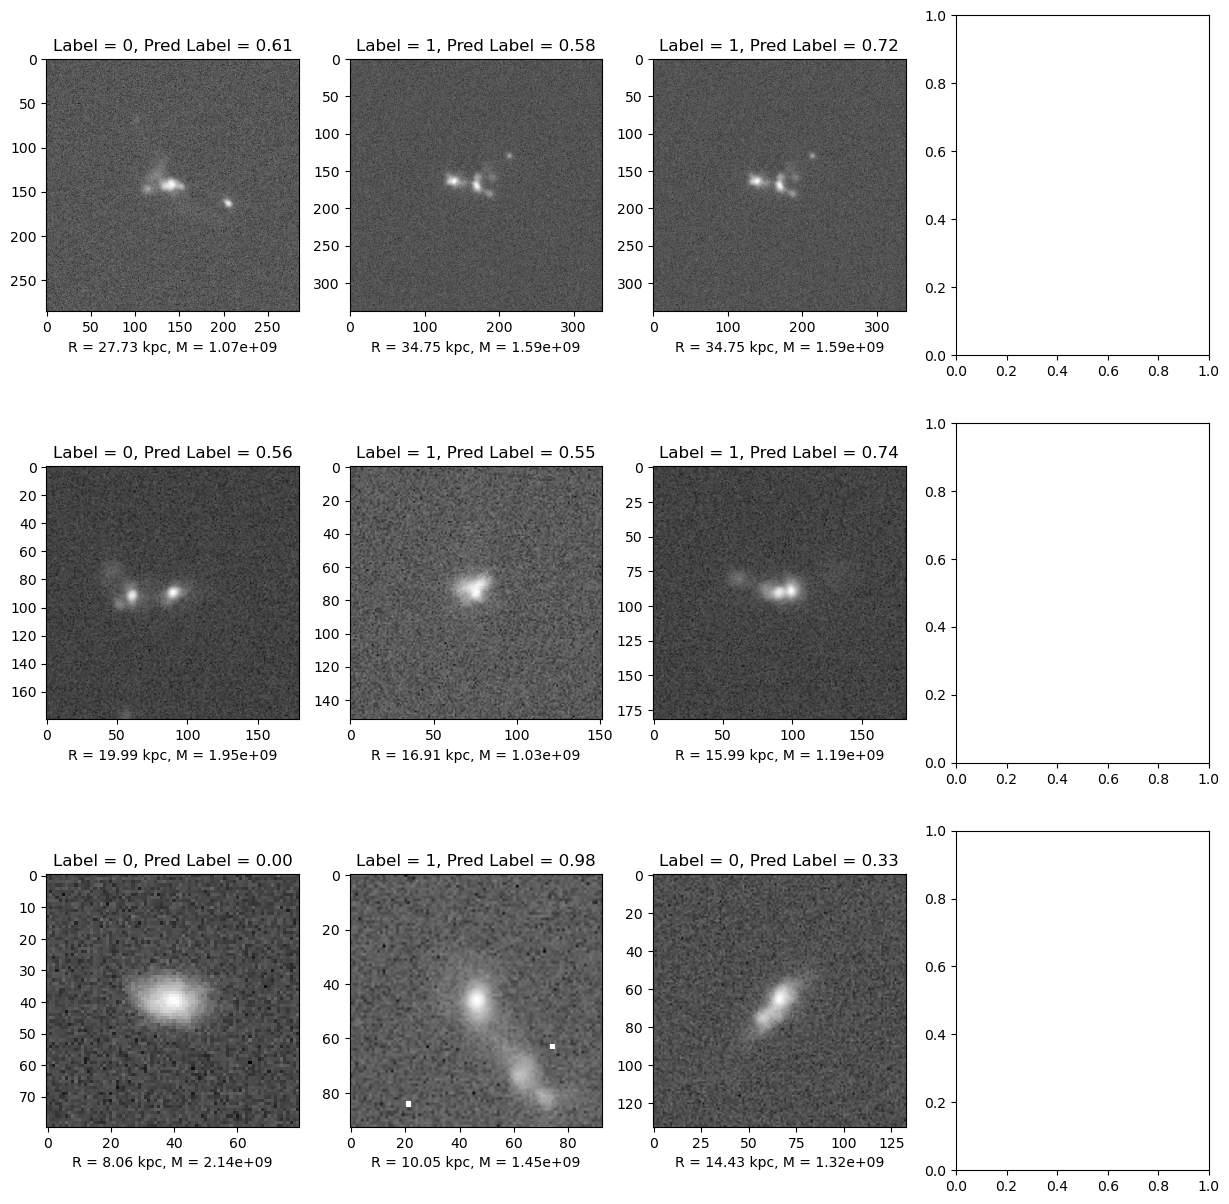

In [23]:
# Plot a few example galaxies from each population

#dfs = [TP, FP, TN, FN]
dfs = results_list.values()

mass_lims_list = [[5, 10], [20, 25], [25, 45], [45, 75]]
hm_rad_lims = [[6.3, 10], [10, 16], [16, 25]]
mass_rad_lims = [[1e-4, 10**-3.5], [10**-3.5, 1e-3], [1e-3, 1e-2]]

fig = plt.figure(figsize = (15,5 * len(mass_rad_lims)))
ax = fig.subplots(len(mass_rad_lims),4)

for j, mass_rad_lim in enumerate(mass_rad_lims):

    for i, df in enumerate(dfs):
        df_filt = df.loc[(df['Mass/radius**2'] > mass_rad_lim[0]) & (df['Mass/radius**2'] < mass_rad_lim[1])].reset_index(drop = True)
        print(len(df_filt))
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            print(idx)
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            ax[j,i].imshow(hdul[1].data[0], cmap = 'gray_r')
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_LABEL'][idx]))
            ax[j,i].set_xlabel('R = %.2f'%(df_filt['HMRad'][idx] / 0.7) + ' kpc, M = %.2e'%(df_filt['Mstellar'][idx] * 1e10))

In [25]:
df = results_list[111]
df_filt = df.loc[(df['Mass/radius**2'] > 1e-4) & (df['Mass/radius**2'] < 10**(-3))].reset_index(drop = True)

In [26]:
(df_filt)

SFID  SnapNum  Mstellar       MBH        MDM      Mgas       SFR  \
0    226901.0     30.0  0.145217  0.000121  16.047434  1.867530  4.356452   
1    203263.0     31.0  0.105671  0.000111  18.980270  3.550233  2.618514   
2    226901.0     30.0  0.145217  0.000121  16.047434  1.867530  4.356452   
3    231722.0     36.0  0.132507  0.000119  24.337841  5.119059  3.516783   
4    143756.0     32.0  0.109527  0.000124  11.700001  1.951877  2.744941   
..        ...      ...       ...       ...        ...       ...       ...   
159  296463.0     34.0  0.138697  0.000102  14.375500  2.218184  1.920648   
160  340291.0     35.0  0.105703  0.000114   8.588191  1.687141  1.564181   
161  238018.0     34.0  0.104390  0.000000  19.756832  2.313613  3.044451   
162  264666.0     45.0  0.130930  0.000270  43.732178  6.554099  3.973699   
163  216548.0     31.0  0.142400  0.000122  14.875512  2.005418  2.772738   

            Z      HMRad     BHacc  ...  ratio_biggest  dt_biggest  \
0    0.004478  14.028102  0.000151  ...       0.000000       0.000   
1    0.004060  12.165909  0.000053  ...       0.000000       0.000   
2    0.004478  14.028102  0.000151  ...       0.000000       0.000   
3    0.002873  15.078295  0.000076  ...       0.533759       0.000   
4    0.003271  19.199907  0.000066  ...       0.185056       0.148   
..        ...        ...       ...  ...            ...         ...   
159  0.005231  15.222480  0.000021  ...       0.225408       0.162   
160  0.005259  10.961619  0.000027  ...       0.000000       0.000   
161  0.003421  15.951656  0.000000  ...       0.448779       0.000   
162  0.003529  15.376784  0.000070  ...       0.052937       0.822   
163  0.006380  12.735546  0.000152  ...       0.222625       0.000   

     SFID_biggest  snap_biggest  Redshift   GAS_FRAC  PRED_LABEL  LABEL  \
0             0.0           0.0      2.32  12.860285    0.941393    0.0   
1             0.0           0.0      2.21  33.596930    0.545451    0.0   
2             0.0           0.0      2.32  12.860285    0.518648    0.0   
3        231722.0          36.0      1.74  38.632478    0.569929    1.0   
4         85524.0          31.0      2.10  17.820897    0.527603    1.0   
..            ...           ...       ...        ...         ...    ...   
159      280414.0          33.0      1.90  15.993038    0.900676    1.0   
160           0.0           0.0      1.82  15.961079    0.253514    0.0   
161      238018.0          34.0      1.90  22.163233    0.711679    1.0   
162      355595.0          40.0      1.21  50.057999    0.606291    0.0   
163      216548.0          31.0      2.21  14.082952    0.684691    1.0   

     Edd_ratio  Mass/radius**2  
0     0.040164        0.000738  
1     0.015526        0.000714  
2     0.040164        0.000738  
3     0.020651        0.000583  
4     0.017236        0.000297  
..         ...             ...  
159   0.006547        0.000599  
160   0.007641        0.000880  
161        NaN        0.000410  
162   0.008384        0.000554  
163   0.040212        0.000878  

[164 rows x 24 columns]

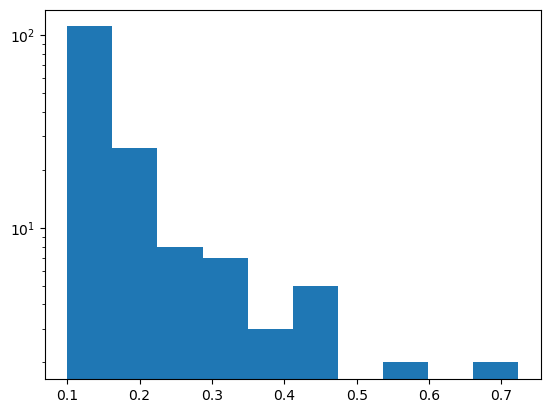

In [30]:
plt.hist(df_filt['Mstellar'])
plt.yscale('log')
